In [206]:
!pip3 install nltk --user;
!pip3 install bs4;
!pip3 install scipy;
!pip3 install sklearn;
!pip3 install pandas;
!pip3 install requests;
!pip3 install nltk;
!pip3 install seaborn;

In [207]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import re
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas_profiling
from pandas_profiling import ProfileReport
# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

# import auc and roc_curve
from sklearn.metrics import auc, roc_curve
# import the logistic regression model
from sklearn.linear_model import LogisticRegression
# import r2_score
from sklearn.metrics import r2_score
# import accuracy_score
from sklearn.metrics import accuracy_score
# import RMSE and MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import AUC and ROC
from sklearn.metrics import auc, roc_curve
# import recall_score, precision_score, f1_score
from sklearn.metrics import recall_score, precision_score, f1_score
# grid search
from sklearn.model_selection import GridSearchCV
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pickle
# sklearn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans

# adaboost imports
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
# import cross_val_score
from sklearn.model_selection import cross_val_score

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Tree imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text

from tqdm import tqdm
# from alive_progress import alive_bar

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### Import the results of the premodeling notebook

# data

* [X_df.csv](./data/X_df.csv) - The features used in the model.
* [autism_thread.csv](./data/autism_thread.csv) - The raw data from the autism thread.
* [best_scores.csv](./data/best_scores.csv) - The best scores from the model.
* [cleaned_reddit.csv](./data/cleaned_reddit.csv) - The cleaned data from the autism thread.
* [cleaned_reddit_withsentiment.csv](./data/cleaned_reddit_withsentiment.csv) - The cleaned data from the autism thread with sentiment analysis. Also includes the OCD thread.
* [cvec.csv](./data/cvec.csv) - The cvec data. Count Vectorized data. This is used in the model.
* [cvec_vocab.txt](./data/cvec_vocab.txt) - The vocabulary used in the cvec data.
* [df_after_feature_engineering.csv](./data/df_after_feature_engineering.csv) - The data after feature engineering. This may not be used in the model.
* [df_cleaned.csv](./data/df_cleaned.csv) - The cleaned data from the autism and OCD threads.
* [drug_info.csv](./data/drug_info.csv) - The drug information from the drugbank database.
* [global_variables.csv](./data/global_variables.csv) - The global variables used in the model.
* [master_results_dataframe.csv](./data/master_results_dataframe.csv) - The master results dataframe.
* [ocd_thread.csv](./data/ocd_thread.csv) - The raw data from the OCD thread.
* [reddit_threads.csv](./data/reddit_threads.csv) - The raw data from the autism and OCD threads.
* [tfidf.csv](./data/tfidf.csv) - The tfidf data. Term Frequency Inverse Document Frequency data. This is used in the model.
* [tfidf_vocab.txt](./data/tfidf_vocab.txt) - The vocabulary used in the tfidf data.
* [y.csv](./data/y.csv) - The target variable used in the model.

In [208]:
# for modeling we will use the following files from the list above.
# 1. df_cleaned.csv
# 2. cleaned_reddit.csv (this is the cleaned version of the reddit data)
# 3. df_reddit.csv (this is the raw version of the reddit data)
df_reddit = pd.read_csv('../data/cleaned_reddit.csv')


# Modeling

In [209]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [210]:
# for this next section we will refer to subreddits as targets
# rename the subreddit column to target in the df_reddit dataframe
df_reddit = df_reddit.rename(columns={'subreddit': 'target'})
# check the dimensions of the dataframe
print(f'Dimensions of the dataframe: {df_reddit.shape}')

Dimensions of the dataframe: (12544, 33)


In [211]:
# create a count vectorizer object
count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
# fit and transform the count vectorizer on the selftext column
try:
    X = count_vectorizer.fit_transform(df_reddit['selftext']) # X is a sparse matrix
except:
    print('There was an error')
    X = None
if X is not None:
    # convert to dense
    X = X.todense() # X is now a dense matrix, which means it is no longer sparse and has no zeros
    # convert to a dataframe and set the column names to the words in the count vectorizer
    X = pd.DataFrame(X, columns=count_vectorizer.get_feature_names())
    X.head()

In [212]:


# # check the dimensions of the dataframe
# print(f'Dimensions of the dataframe: {X.shape}')
# # X.head(5)
# # Now we want to add the target column to the X dataframe so that we can use it to train the model
# # add the target column to the X dataframe (the target column is the subreddit column from the df_reddit dataframe)
# X['subreddit_target'] = df_reddit['target']
# # check the dimensions of the dataframe
# print(f'Dimensions of the dataframe: {X.shape}')

# # import train_test_split
# from sklearn.model_selection import train_test_split
# # split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X.drop('subreddit_target', axis=1), X['subreddit_target'], test_size=0.2, random_state=42)
# # check the dimensions of the training and testing sets
# print(f'Dimensions of the training set: {X_train.shape}')
# print(f'Dimensions of the testing set: {X_test.shape}')


In [213]:
# check the dimensions of the dataframe
if X.shape[0] != df_reddit.shape[0]:
    print('The dataframe dimensions do not match!')
else:
    print(f'Dimensions of the dataframe: {X.shape}')
# X.head(5)
# Now we want to add the target column to the X dataframe so that we can use it to train the model
# add the target column to the X dataframe (the target column is the subreddit column from the df_reddit dataframe)
X['subreddit_target'] = df_reddit['target']
# check the dimensions of the dataframe
if X.shape[0] != df_reddit.shape[0]:
    print('The dataframe dimensions do not match!')
else:
    print(f'Dimensions of the dataframe: {X.shape}')

# import train_test_split
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.drop('subreddit_target', axis=1), X['subreddit_target'], test_size=0.2, random_state=42)
# check the dimensions of the training and testing sets
if X_train.shape[0] != y_train.shape[0]:
    print('The training set dimensions do not match!')
else:
    print(f'Dimensions of the training set: {X_train.shape}')
if X_test.shape[0] != y_test.shape[0]:
    print('The testing set dimensions do not match!')
else:
    print(f'Dimensions of the testing set: {X_test.shape}')


Dimensions of the dataframe: (12544, 1000)
Dimensions of the dataframe: (12544, 1001)
Dimensions of the training set: (10035, 1000)
Dimensions of the testing set: (2509, 1000)


In [214]:
# # use tfidf vectorizer to create a bag of words for the selftext column
# from sklearn.feature_extraction.text import TfidfTransformer
# print(f'Instantiate the TfidfTransformer object')
# # instantiate the TfidfTransformer object
# tfidf_transformer = TfidfTransformer()
# print(f'Fit the TfidfTransformer object on the training set')
# # fit the TfidfTransformer object on the training set
# tfidf_transformer.fit(X_train)
# # transform the training set
# X_train_tfidf = tfidf_transformer.transform(X_train)
# # transform the testing set
# X_test_tfidf = tfidf_transformer.transform(X_test)
# # check the dimensions of the training and testing sets
# print(f'Dimensions of the training set: {X_train_tfidf.shape}')
# print(f'Dimensions of the testing set: {X_test_tfidf.shape}')
# # what we have done is created a bag of words using the tfidf vectorizer and then used the bag of words to train the model
# # this differs from count vectorizer because it uses the term frequency-inverse document frequency (tfidf) to create the bag of words.
# # tfidf is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
# # the tfidf value increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.


# # import train_test_split
# from sklearn.model_selection import train_test_split
# # split the data into training and testing sets (X_train_tfidf is the bag of words created using the tfidf vectorizer)
# X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# # check the dimensions of the training and testing sets
# print(f'Dimensions of the training set: {X_train_tfidf.shape}')
# print(f'Dimensions of the testing set: {X_test_tfidf.shape}')


In [215]:
# # how do we include X_train_tfidf and X_test_tfidf in the model?
# # we need to convert them to a dataframe
# # convert the training set to a dataframe
# X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=count_vectorizer.get_feature_names())
# # convert the testing set to a dataframe
# X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=count_vectorizer.get_feature_names())
# # check the dimensions of the training and testing sets
# print(f'Dimensions of the training set: {X_train_tfidf.shape}')
# print(f'Dimensions of the testing set: {X_test_tfidf.shape}')

In [216]:
# model results df
master_results_dataframe = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'auc', 'cross_val_score', 'rmse', 'mae', 'r2','mse', 'time','train_score', 'test_score', 'best_params', 'residuals'])

In [217]:
# create a dictionary of parameters for each model type

param_defaults = {
    'logreg': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01] #!0.1, 1, 10, 100, 1000]
    },
    'knn': {
        'n_neighbors': list(range(1,5)), #! 31)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'random_forest': {
        'n_estimators': [10, 100 ] ,#! 1000],
        'max_depth': [3, 5], #! 10, None],
        'max_features': ['auto', 'sqrt']
    },
    'svm': {
        'kernel': ['linear', 'poly'], #!, 'rbf', 'sigmoid'],
        'C': [0.001, 0.01], #! 0.1, 1, 10, 100, 1000]
    },
    'decision_tree': {
        'max_depth': [3, 5, 10, None],
        'max_features': ['auto', 'sqrt', 'log2', None]
    },
    'gradientboostingclassifier': {
        'n_estimators': [10, 100, 1000],
        'max_depth': [3, 5, 10, None],
        'max_features': ['auto', 'sqrt']
    },
    'adaboost': {
        'n_estimators': [10, 100, 1000],
        'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'bagging': {
        'n_estimators': [10, 100, 1000],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    'extra_trees': {
        'n_estimators': [10, 100, 1000],
        'max_depth': [3, 5, 10, None],
        'max_features': ['auto', 'sqrt', 'log2', None]
    },
    'gaussian_nb': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    },
    'bernoulli_nb': {
        'alpha': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    },
    'multinomial_nb': {
        'alpha': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    },
    'linear_svc': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'xgboost': {
        'n_estimators': [10, 100, 1000],
        'max_depth': [3, 5, 10, None],
        'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
}

In [218]:
def save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train,param_defaults,gridsearch=False):
    """
    save_results takes in a model and a master results dataframe and saves the model and the master results dataframe as a pickle file

    _extended_summary_

    :param model: _description_
    :type model: _type_
    :param master_results_dataframe: _description_
    :type master_results_dataframe: _type_
    :return: _description_
    :rtype: _type_
    """

    gridsearch = False # set to True if you want to use gridsearch

    if model not in ['decision_tree', 'random_forest', 'knn', 'svm', 'gradientboostingclassifier', 'adaboost', 'bagging', 'extra_trees', 'gaussian_nb', 'bernoulli_nb', 'multinomial_nb', 'linear_svc', 'xgboost']:
        # evaluate the model
        acc_score = accuracy_score(y_test, y_pred) # accuracy score for the model on the testing set
        cross_val = cross_val_score(model, X_train, y_train, cv=5).mean()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error on the testing set
        mae = mean_absolute_error(y_test, y_pred) # on the testing set
        r2 = r2_score(y_test, y_pred) #
        mse = mean_squared_error(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score = auc(fpr, tpr)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        model_name = str(model).lower().replace(' ', '_').replace('(', '').replace(')', '')
        
        print(f'accuracy_score: {acc_score}')
        print(f'cross_val_score: {cross_val}')
        print(f'rmse: {rmse}')
        print(f'mae: {mae}')
        print(f'r2: {r2}')
        print(f'mse: {mse}')
        print(f'auc: {auc_score}')
        # print(f'false positive rate: {fpr}')
        # print(f'true positive rate: {tpr}')
        print(f'thresholds: {thresholds}')

        # AUC and ROC
        # calculate the probabilities
        try:
            y_pred_prob = model.predict_proba(X_test)[:,1]
            # calculate the false positive rate and true positive rate
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
            # calculate the area under the curve
            print(f'AUC score: {auc(fpr, tpr)}')
        except Exception as e:
            print(e)
            y_pred_prob = ''
            fpr, tpr, thresholds = '', '', ''
            auc_score = ''
            print(f'Initialized all of the following to None: y_pred_prob, fpr, tpr, thresholds, auc_score')

        #  train score
        train_score = model.score(X_train, y_train)
        # test score
        test_score = model.score(X_test, y_test)

        # perform grid search to find the best parameters
        # create a dictionary of parameters to search (for a logistic regression model)
        if gridsearch:
            try:
                print('Performing Grid Search...')
                # find the parameters dict that matches the model name in the dictionary of parameters, and assign it to params
                params = param_defaults.get(model_name) # get the parameters for the model
                cv_num = 3 # number of cross validations to perform
                print('Parameters for the model: ', params)
                print(f'Estimated time to complete grid search: {len(params)*cv_num} seconds')
                # create a grid search object
                grid_search = GridSearchCV(model, params, cv=cv_num, verbose=0, n_jobs=-1)
                # fit the grid search object to the training data
                grid_search.fit(X_train, y_train)
                # get the best parameters
                best_params = grid_search.best_params_
                # get the best score
                best_score = grid_search.best_score_
                print(f'best parameters: {best_params}')
                print(f'best score: {best_score}')
                # best params
                best_params = model.best_params_
            except Exception as e:
                print(e)
                best_params = None
                best_score = None
        else:
            best_params = None
            best_score = None
        # add the results to the master results dataframe using concat
        master_results_dataframe = pd.concat([master_results_dataframe, pd.DataFrame({ 'model': [model_name], 'accuracy_score': [acc_score], 'cross_val_score': [cross_val], 'rmse': [rmse], 'mae': [mae], 'r2': [r2], 'mse': [mse], 'auc': [auc_score], 'precision': [precision], 'recall': [recall], 'f1': [f1], 'train_score': [train_score], 'test_score': [test_score], 'best_params': [best_params], 'best_score': [best_score], 'residuals': [y_test - y_pred] })], ignore_index=True)
        # save the model and the master results dataframe as a pickle file

        pickle.dump(model, open(f'../models/{model_name}.pkl', 'wb'))
        # plot the ROC curve
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model} ROC Curve')
        # save the plot as a png file
        plt.savefig(f'../images/{model}_roc_curve.png')
        plt.show(); # the ROC curve is a plot of the true positive rate against the false positive rate
    return master_results_dataframe

# checking function for data integrity
def check_xtrain_is_same(X_train, original_X_train):
    if X_train.equals(original_X_train):
        return True #  X_train is the same as original_X_train
    else:
        return False #  X_train is not the same as original_X_train


In [219]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [220]:
# Establish original_X_train and original_X_test
original_X_train = X_train
original_X_test = X_test

#### Logistic Regression Model

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       738
           1       0.93      0.94      0.94      1771

    accuracy                           0.91      2509
   macro avg       0.89      0.89      0.89      2509
weighted avg       0.91      0.91      0.91      2509



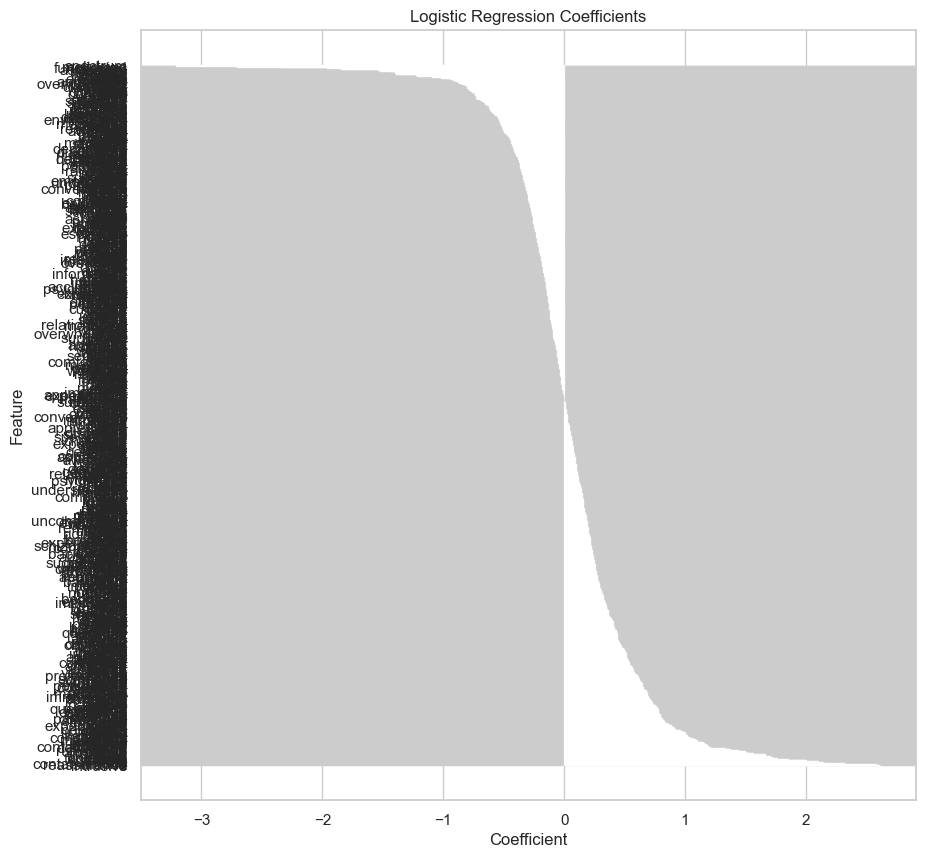

accuracy_score: 0.9095257074531686
cross_val_score: 0.9095166915794719
rmse: 0.30078944886220893
mae: 0.09047429254683141
r2: 0.5642357524648086
mse: 0.09047429254683141
auc: 0.8880950850728158
thresholds: [2 1 0]
AUC score: 0.9636640606948135


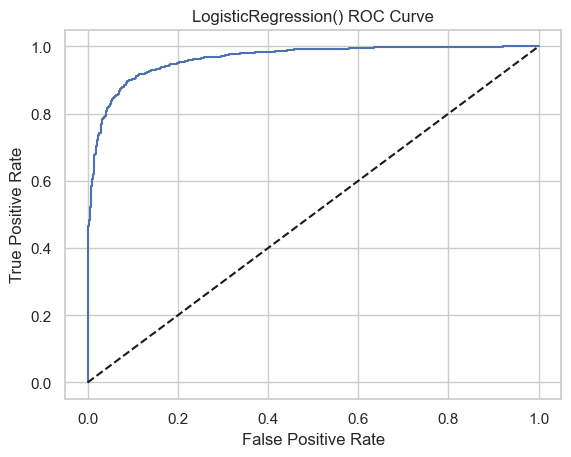

In [221]:
# check the shape of the training data to make sure it is the same as the testing data
if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')
# create a logistic regression model
logreg = LogisticRegression()
# fit the model to the training data
logreg.fit(X_train, y_train)
# score the model on the training data
logreg.score(X_train, y_train)
# score the model on the testing data
logreg.score(X_test, y_test)
# predict the target values for the testing data
y_pred = logreg.predict(X_test)
# create a confusion matrix
confusion_matrix(y_test, y_pred)
# create a classification report
print(classification_report(y_test, y_pred))
# create a dataframe of the coefficients
coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': logreg.coef_[0]})
# sort the coefficients by their magnitude
coefficients.sort_values('coefficient', ascending=False, inplace=True)
# plot the coefficients
plt.figure(figsize=(10, 10))
plt.barh(coefficients['feature'], coefficients['coefficient'])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.savefig('../images/logreg_coefficients.png')
plt.show();
master_results_dataframe = save_results(logreg,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

In [222]:
# # logistic regression model with tfidf vectorizer
# # create a logistic regression model
# logreg_tfidf = LogisticRegression()

# # fit the model on the training data
# logreg_tfidf.fit(X_train_tfidf, y_train)

# # predict on the testing data
# y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

# # evaluate the model
# acc_score_tfidf = accuracy_score(y_test, y_pred_tfidf)
# cross_val_tfidf = cross_val_score(logreg_tfidf, X_train_tfidf, y_train_tfidf, cv=5).mean()
# rmse_tfidf = np.sqrt(mean_squared_error(y_test, y_pred_tfidf))
# mae_tfidf = mean_absolute_error(y_test, y_pred_tfidf)
# r2_tfidf = r2_score(y_test, y_pred_tfidf)
# mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)
# fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y_test, y_pred_tfidf)
# auc_score_tfidf = auc(fpr_tfidf, tpr_tfidf)
# precision_tfidf = precision_score(y_test, y_pred_tfidf)
# recall_tfidf = recall_score(y_test, y_pred_tfidf)
# f1_tfidf = f1_score(y_test, y_pred_tfidf)

# # AUC and ROC
# # calculate the probabilities
# y_pred_prob_tfidf = logreg.predict_proba(X_test_tfidf)#true positive rate
# fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y_test, y_pred_prob_tfidf)# calculate the area under the curve
# # calculate the area under the curve
# print(f'AUC score: {auc(fpr_tfidf, tpr_tfidf)}')

# # add the results to the master results dataframe using concat
# master_results_dataframe = pd.concat([master_results_dataframe, pd.DataFrame({'model': 'logreg_tfidf', 'accuracy': acc_score_tfidf, 'precision': precision_tfidf, 'recall': recall_tfidf, 'f1': f1_tfidf, 'auc': auc_score_tfidf, 'cross_val_score': cross_val_tfidf, 'rmse': rmse_tfidf, 'mae': mae_tfidf, 'r2': r2_tfidf, 'mse': mse_tfidf}, index=[0])], ignore_index=True)

# # check the master results dataframe
# master_results_dataframe.head(50)


#### Adaboost Model


accuracy_score: 0.885611797528896
cross_val_score: 0.8922770303936222
rmse: 0.3382132499934088
mae: 0.11438820247110403
r2: 0.44905577514273154
mse: 0.11438820247110403
auc: 0.8482350393803203
thresholds: [2 1 0]
AUC score: 0.9516330552915919


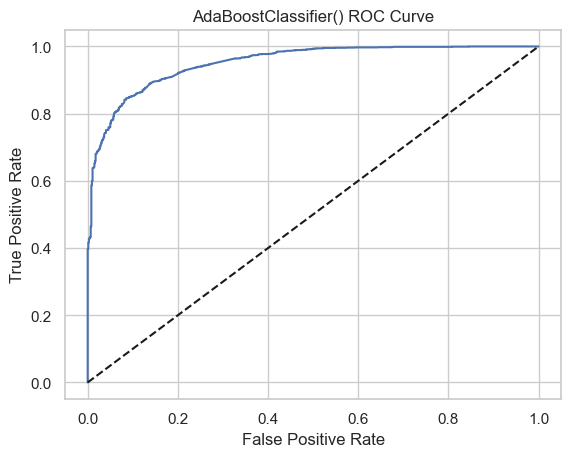

model accuracy  precision    recall        f1       auc  \
0  logisticregression      NaN   0.932251  0.940147  0.936182  0.888095   
1  adaboostclassifier      NaN   0.902823  0.939018  0.920565  0.848235   

   cross_val_score      rmse       mae        r2       mse time  train_score  \
0         0.909517  0.300789  0.090474  0.564236  0.090474  NaN     0.963627   
1         0.892277  0.338213  0.114388  0.449056  0.114388  NaN     0.902143   

   test_score best_params                                          residuals  \
0    0.909526        None  3128     0
1839     1
1327     0
11334    0
12...   
1    0.885612        None  3128     0
1839     1
1327     0
11334    0
12...   

   accuracy_score best_score  
0        0.909526       None  
1        0.885612       None

In [223]:

# import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# check the shape of the training data to make sure it is the same as the testing data
if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')


# create an AdaBoost classifier
ada = AdaBoostClassifier()

# fit the model on the training data
ada.fit(X_train, y_train)

# predict on the testing data
y_pred = ada.predict(X_test)

# 'y_test', 'y_pred', 'X_train', 'X_test', and 'y_train' are in the environment
master_results_dataframe = save_results(ada,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

master_results_dataframe.head(5)


accuracy_score: 0.8836189717018732
cross_val_score: 0.8850024912805182
rmse: 0.34114663753014884
mae: 0.11638102829812674
r2: 0.4394574436992251
mse: 0.11638102829812674
auc: 0.8140234338537625
thresholds: [2 1 0]
AUC score: 0.9524838599599998


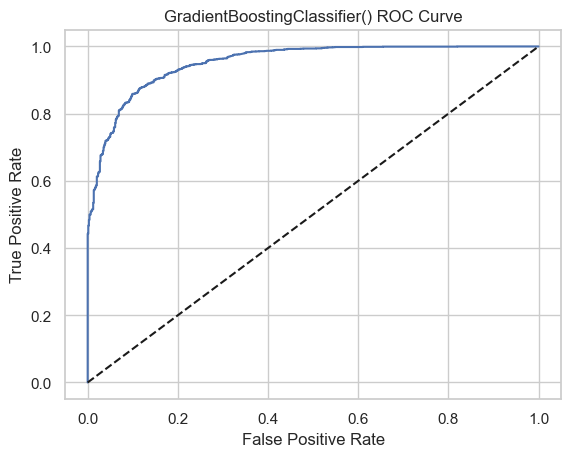

In [224]:

# import the Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier


# check the shape of the training data to make sure it is the same as the testing data
if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')


# create a Gradient Boosting classifier
gbc = GradientBoostingClassifier()
model = gbc
# fit the model on the training data
gbc.fit(X_train, y_train)

# predict on the testing data
y_pred = gbc.predict(X_test)

master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)



accuracy_score: 0.8919888401753687
cross_val_score: 0.9014449427005481
rmse: 0.32865051319696936
mae: 0.10801115982463133
r2: 0.4797704357619521
mse: 0.10801115982463133
auc: 0.8306221585648945
thresholds: [2 1 0]
AUC score: 0.9608538039078867


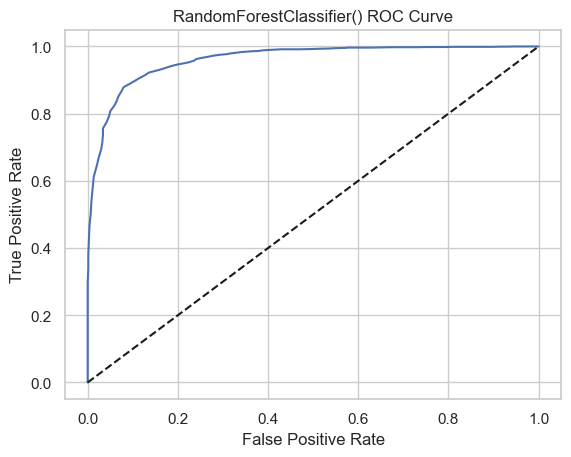

In [225]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# check the shape of the training data to make sure it is the same as the testing data
if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')

# create a random forest classifier
rfc = RandomForestClassifier()
model = rfc
# fit the model on the training data
rfc.fit(X_train, y_train)

# predict on the testing data
y_pred = rfc.predict(X_test)

master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

accuracy_score: 0.8361897170187326
cross_val_score: 0.8260089686098654
rmse: 0.404734830452319
mae: 0.16381028298126743
r2: 0.2110171553437724
mse: 0.16381028298126743
auc: 0.8610433986892099
thresholds: [2 1 0]
AUC score: 0.9276219244405883


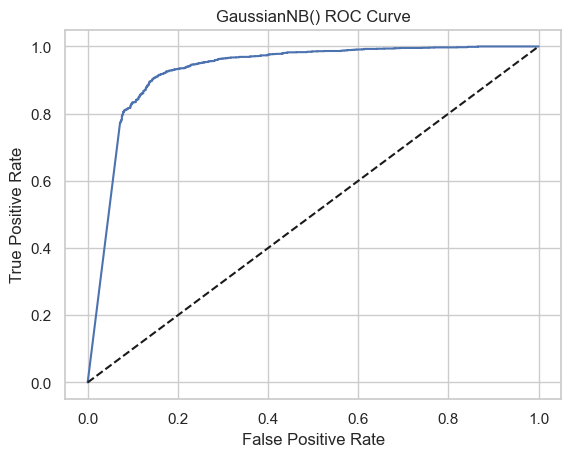

In [226]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# check the shape of the training data to make sure it is the same as the testing data
if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')


# create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

model = gnb

# fit the model on the training data
gnb.fit(X_train, y_train)

# predict on the testing data
y_pred = gnb.predict(X_test)

master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults,gridsearch=False)

Fitting the model on the training data...
Predicting on the testing data...
Preparing The Results
accuracy_score: 0.59824631327222
cross_val_score: 0.5602391629297458
rmse: 0.6338404268645067
mae: 0.40175368672778
r2: -0.935023619010894
mse: 0.40175368672778
auc: 0.6545572372719776
thresholds: [2 1 0]
AUC score: 0.6843013531772811


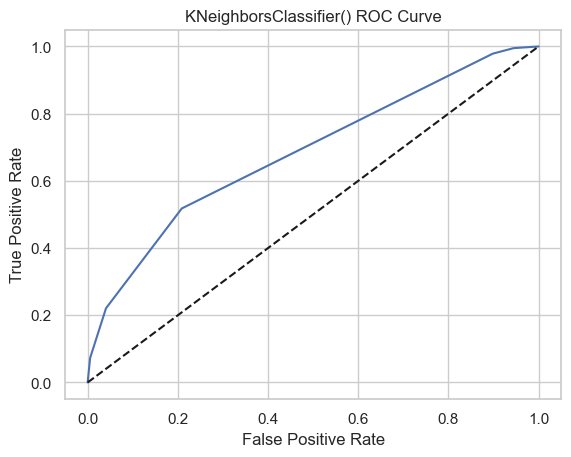

In [227]:
# K Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# check the shape of the training data to make sure it is the same as the testing data
if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')


# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create a K Nearest Neighbors classifier
knn = KNeighborsClassifier()

model = knn

print(f'Fitting the model on the training data...')
# fit the model on the training data
knn.fit(X_train_scaled, y_train)

print(f'Predicting on the testing data...')
# predict on the testing data
y_pred = knn.predict(X_test_scaled)

print(f'Preparing The Results')
master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train_scaled, X_test_scaled, y_train, param_defaults,gridsearch=False)

Preparing The Results
accuracy_score: 0.8278198485452372
cross_val_score: 0.8213253612356752
rmse: 0.4149459620899604
mae: 0.17218015145476284
r2: 0.17070416328104543
mse: 0.17218015145476284
auc: 0.793861582037616
thresholds: [2 1 0]
AUC score: 0.793861582037616


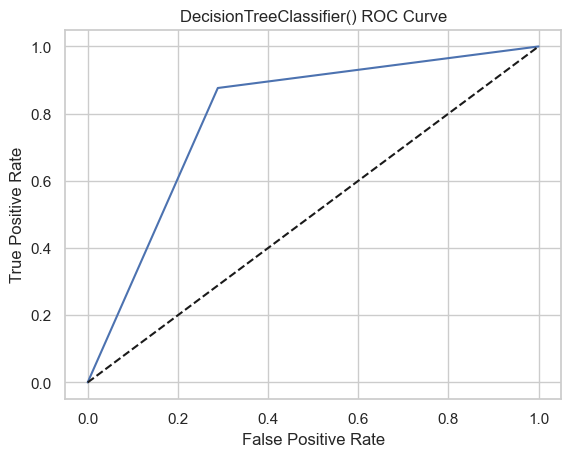

In [228]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# check the shape of the training data to make sure it is the same as the testing data
if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')

#note: Be sure to scale the data before using SVM
X_train_sc = sc.fit_transform(X_train) # fit and transform the training data
X_test_sc = sc.transform(X_test) # transform the testing data



# create a Decision Tree classifier
dtc = DecisionTreeClassifier()

model = dtc

# fit the model on the training data

dtc.fit(X_train, y_train)

# predict on the testing data

y_pred = dtc.predict(X_test)

print(f'Preparing The Results')
master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train, X_test, y_train, param_defaults)

Preparing The Results
accuracy_score: 0.9043443603029095
cross_val_score: 0.9048330842052815
rmse: 0.30928245940740073
mae: 0.09565563969709047
r2: 0.5392800907116919
mse: 0.09565563969709047
auc: 0.8638754611713254
thresholds: [2 1 0]
predict_proba is not available when  probability=False
Initialized all of the following to None: y_pred_prob, fpr, tpr, thresholds, auc_score


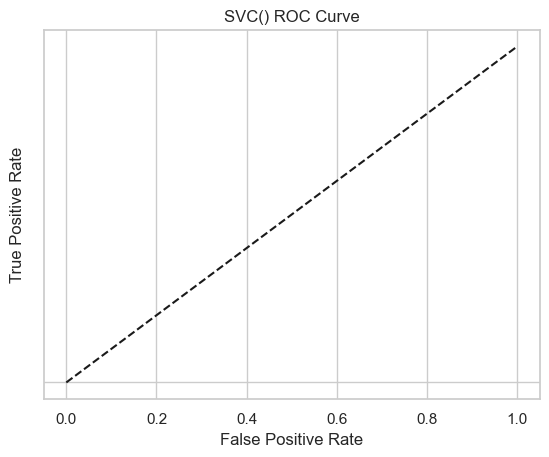

In [229]:
# Support Vector Machine Classifier
from sklearn.svm import SVC

# check the shape of the training data to make sure it is the same as the testing data
if not check_xtrain_is_same(X_train, original_X_train):
    raise Exception('X_train has been modified')

#note: Be sure to scale the data before using SVM
X_train_sc = sc.fit_transform(X_train) # fit and transform the training data
X_test_sc = sc.transform(X_test) # transform the testing data

# create a Support Vector Machine classifier
svc = SVC()

model = svc

# fit the model on the training data
svc.fit(X_train_sc, y_train)

# predict on the testing data
y_pred = svc.predict(X_test_sc)

print(f'Preparing The Results')
master_results_dataframe = save_results(model,master_results_dataframe, y_test, y_pred, X_train_sc, X_test_sc, y_train, param_defaults)

In [230]:
# drop the duplicated logreg model row
master_results_dataframe = master_results_dataframe.drop_duplicates(subset=['model'], keep='first')

In [231]:
master_results_dataframe.head(30)

model accuracy  precision    recall        f1  \
0          logisticregression      NaN   0.932251  0.940147  0.936182   
1          adaboostclassifier      NaN   0.902823  0.939018  0.920565   
2  gradientboostingclassifier      NaN   0.869196  0.983060  0.922629   
3      randomforestclassifier      NaN   0.880711  0.979673  0.927559   
4                  gaussiannb      NaN   0.960705  0.800678  0.873422   
5        kneighborsclassifier      NaN   0.856209  0.517787  0.645320   
6      decisiontreeclassifier      NaN   0.879320  0.876341  0.877828   
7                         svc      NaN   0.907832  0.962168  0.934211   

        auc  cross_val_score      rmse       mae        r2       mse time  \
0  0.888095         0.909517  0.300789  0.090474  0.564236  0.090474  NaN   
1  0.848235         0.892277  0.338213  0.114388  0.449056  0.114388  NaN   
2  0.814023         0.885002  0.341147  0.116381  0.439457  0.116381  NaN   
3  0.830622         0.901445  0.328651  0.108011  0.479770  0.108011  NaN   
4  0.861043         0.826009  0.404735  0.163810  0.211017  0.163810  NaN   
5  0.654557         0.560239  0.633840  0.401754 -0.935024  0.401754  NaN   
6  0.793862         0.821325  0.414946  0.172180  0.170704  0.172180  NaN   
7                   0.904833  0.309282  0.095656  0.539280  0.095656  NaN   

   train_score  test_score best_params  \
0     0.963627    0.909526        None   
1     0.902143    0.885612        None   
2     0.898455    0.883619        None   
3     1.000000    0.891989        None   
4     0.832885    0.836190        None   
5     0.930842    0.598246        None   
6     1.000000    0.827820        None   
7     0.974888    0.904344        None   

                                           residuals  accuracy_score  \
0  3128     0
1839     1
1327     0
11334    0
12...        0.909526   
1  3128     0
1839     1
1327     0
11334    0
12...        0.885612   
2  3128     0
1839     0
1327     0
11334   -1
12...        0.883619   
3  3128     0
1839     0
1327     0
11334   -1
12...        0.891989   
4  3128     0
1839     1
1327     0
11334    0
12...        0.836190   
5  3128     0
1839     1
1327     0
11334    0
12...        0.598246   
6  3128     0
1839     0
1327     0
11334    0
12...        0.827820   
7  3128     0
1839     1
1327     0
11334    0
12...        0.904344   

  best_score  
0       None  
1       None  
2       None  
3       None  
4       None  
5       None  
6       None  
7       None

In [232]:
master_results_dataframe.sort_values(by='accuracy', ascending=False)
# save to csv
master_results_dataframe.to_csv('../data/master_results_dataframe.csv', index=False)

In [233]:
print(f'The csv files generated here have the following sizes: \n X_df: {os.path.getsize("../data/X_df.csv")/1000000} MB \n y: {os.path.getsize("../data/y.csv")/1000000} MB')

The csv files generated here have the following sizes: 
 X_df: 36.092971 MB 
 y: 0.036091 MB


TFIDF Vectorizer

In [234]:
# plot the results of the models as follows:
# a scatterplot with the x-axis being precision and the y-axis being recall
# the color represents the r2 score
# the size of the marker represents the cross_val_score
# the shape of the marker represents the model

In [235]:

# function to print the confusion matrix

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig



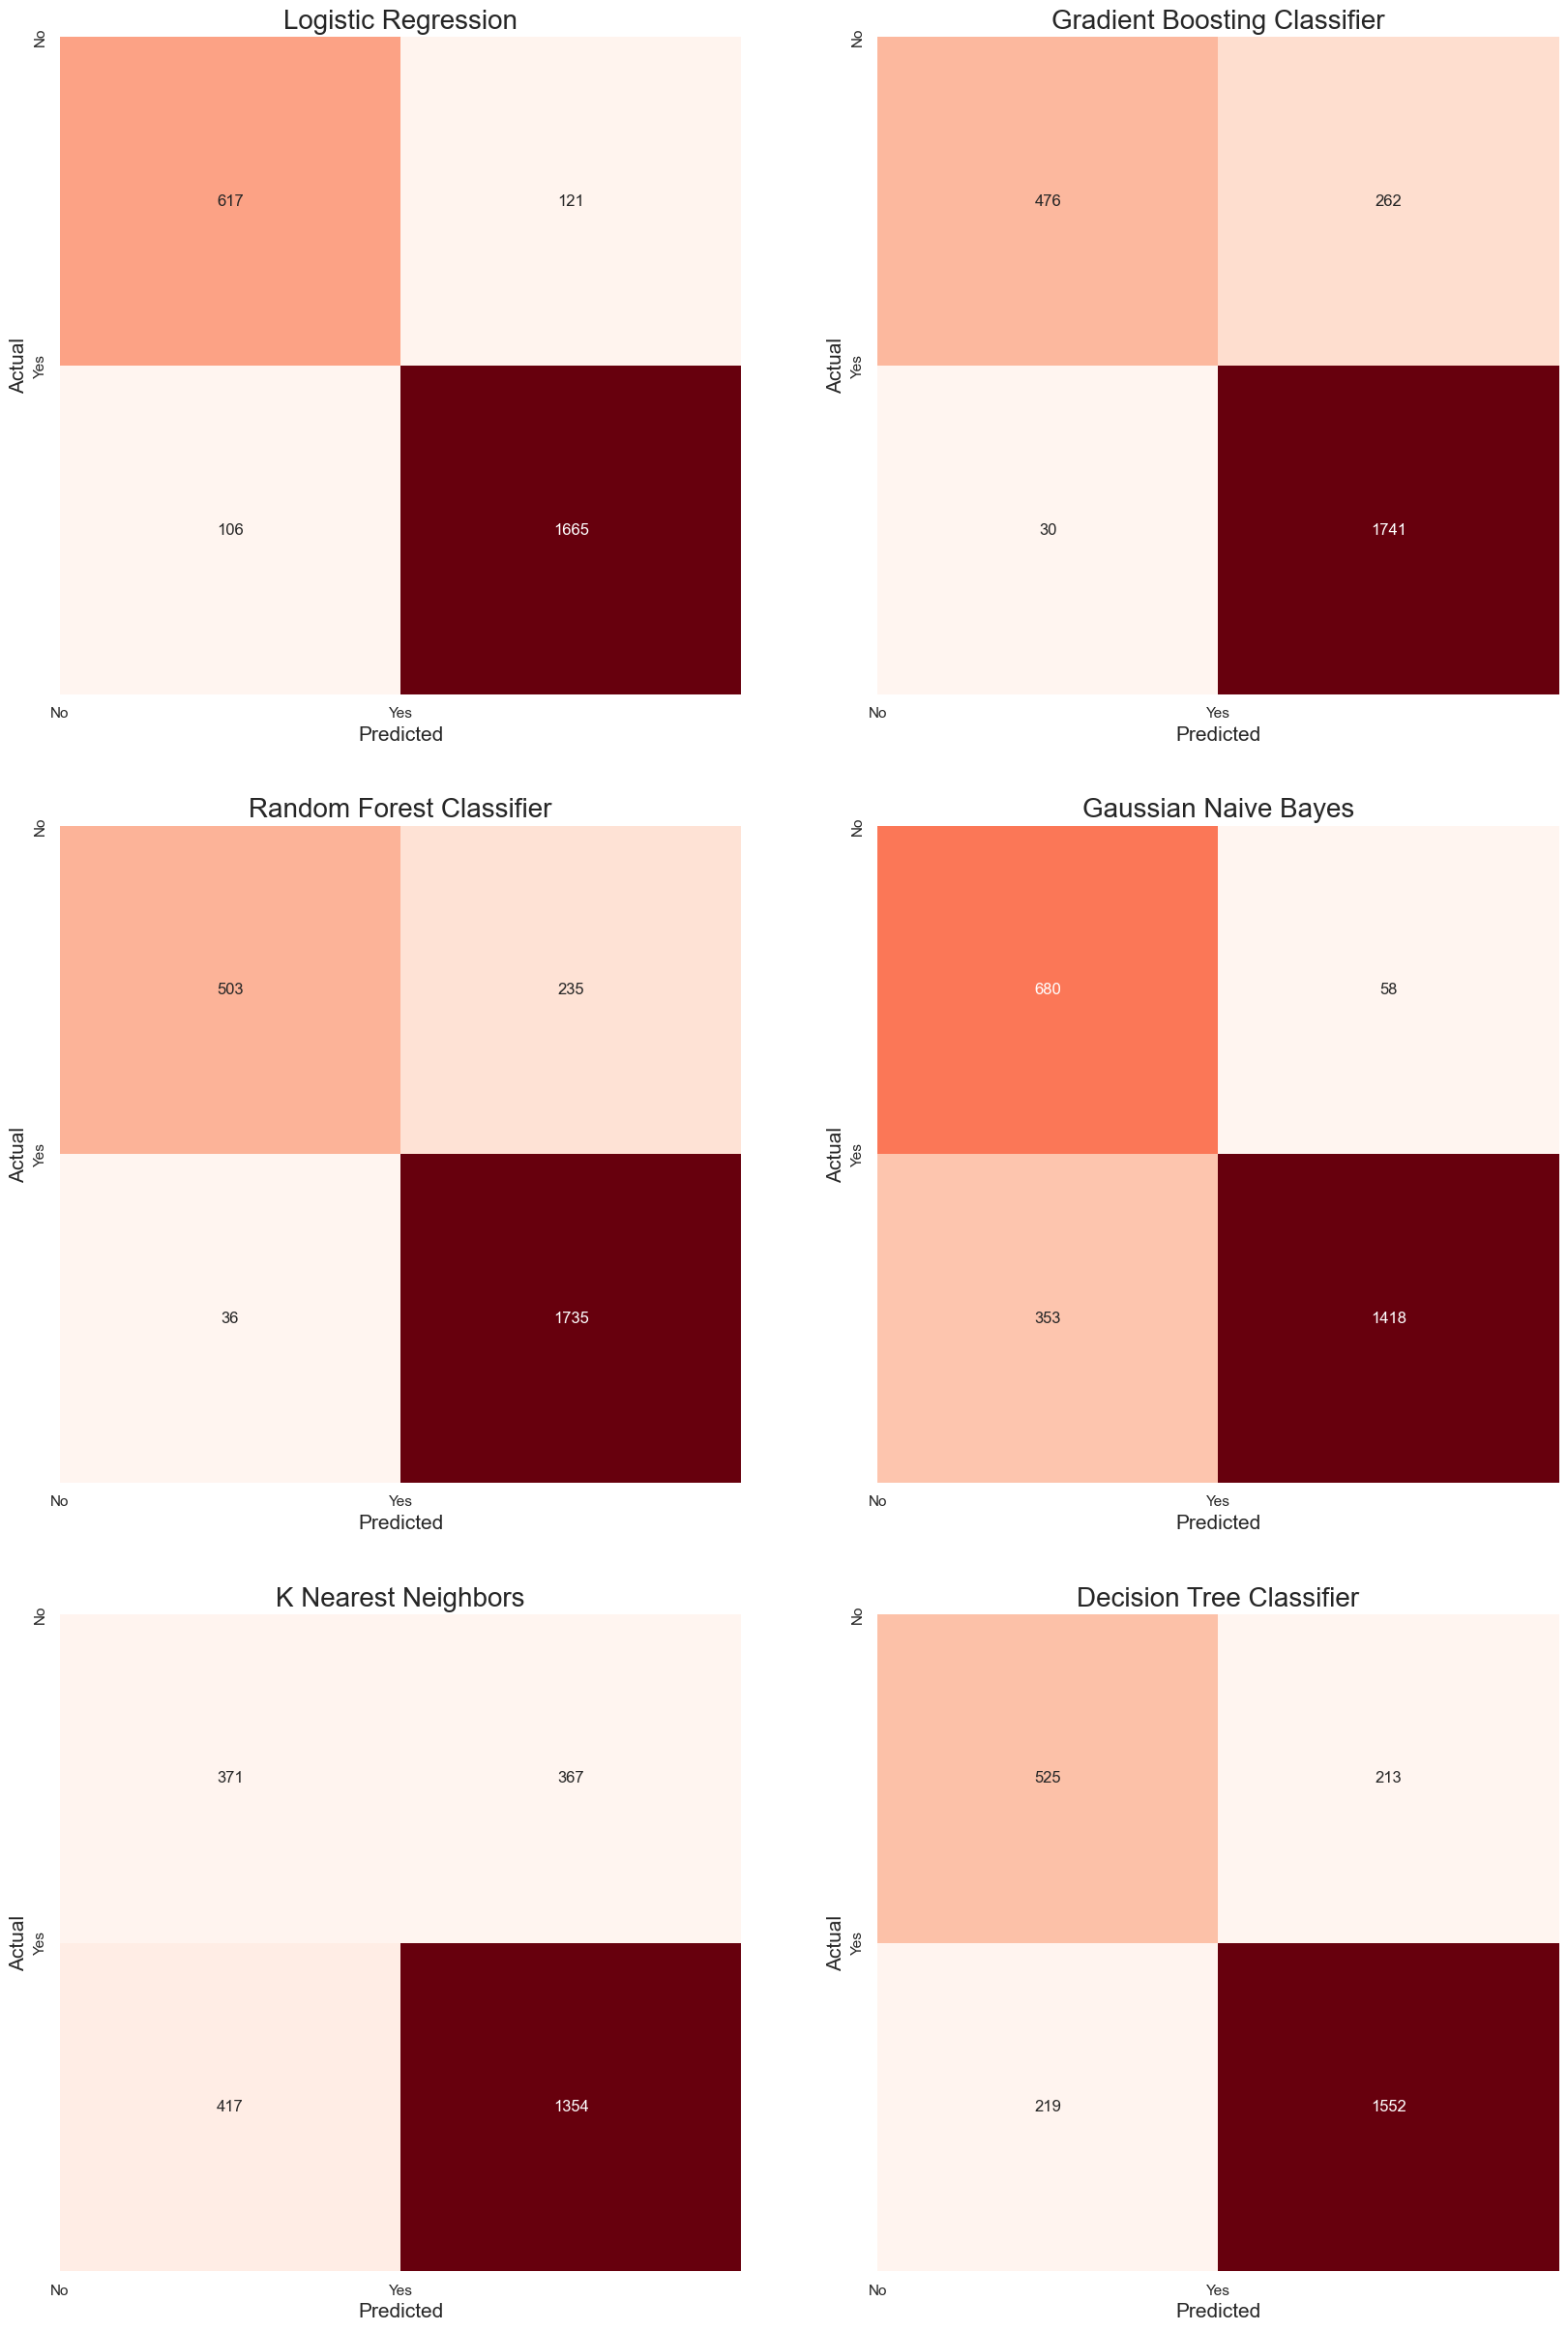

In [236]:
# import the confusion matrix function
from sklearn.metrics import confusion_matrix
# use the print_confusion_matrix function to print the confusion matrix for each model and create a multiplot figure with the results of all the models in one figure with subplots.
# create a figure object
fig = plt.figure(figsize=(20, 30))
# create a list of the models
models = [logreg, gbc, rfc, gnb, knn, dtc]
# create a list of the model names
model_names = ['Logistic Regression', 'Gradient Boosting Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'K Nearest Neighbors', 'Decision Tree Classifier']
# create a list of the model colors
model_colors = ['red', 'blue', 'green', 'orange', 'purple', 'black']
# create a list of the model markers
model_markers = ['o', 'v', 's', 'p', 'D', 'X']

# create a for loop to iterate through the models and plot the confusion matrix for each model
for i in range(len(models)):
    # create a subplot for each model
    ax = fig.add_subplot(3, 2, i+1)
    # create a confusion matrix for each model
    cm = confusion_matrix(y_test, models[i].predict(X_test))
    # plot the confusion matrix for each model
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False, cmap='Reds')
    # make annotations for each subplot have font size 20
    
    # set the title of the subplot to the model name
    ax.set_title(model_names[i], fontsize=20)
    # set the x and y labels of the subplot
    ax.set_xlabel('Predicted', fontsize=15)
    ax.set_ylabel('Actual', fontsize=15)
    # assign a new cmap color to this subplot
    # assign the model color to the subplot
    ax.set_facecolor(model_colors[i])
    # set the x and y ticks of the subplot
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    # set the x and y tick labels of the subplot
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_yticklabels(['No', 'Yes'])
    # add the subplot to the figure
    fig.add_subplot(ax)

# save the figure
fig.savefig('../images/confusion_matrix.png')

# show the figure
fig.show()


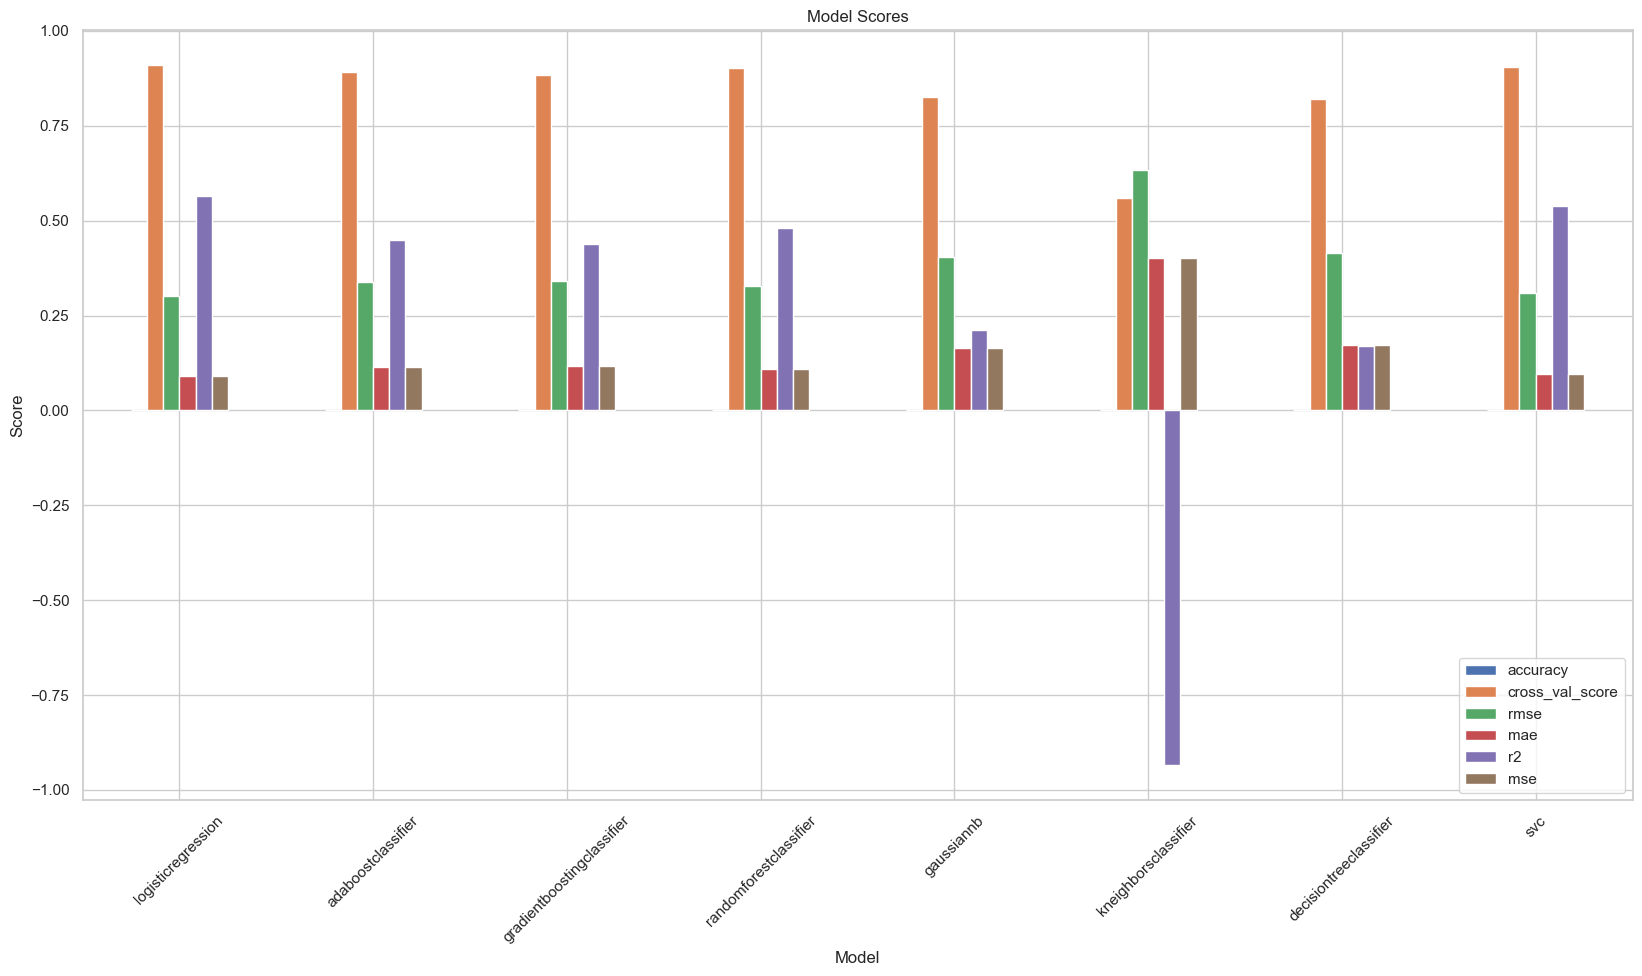

In [237]:

master_results_dataframe.plot.bar(x='model', y=['accuracy','cross_val_score', 'rmse', 'mae', 'r2', 'mse'], figsize=(20,10), title='Model Scores')

plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.savefig('../images/model_scores.png')
plt.show();


Random Forest Model had the best r2 score. 

In [238]:
import numpy as np
import seaborn as sns


In [239]:
master_results_dataframe.head()

model accuracy  precision    recall        f1  \
0          logisticregression      NaN   0.932251  0.940147  0.936182   
1          adaboostclassifier      NaN   0.902823  0.939018  0.920565   
2  gradientboostingclassifier      NaN   0.869196  0.983060  0.922629   
3      randomforestclassifier      NaN   0.880711  0.979673  0.927559   
4                  gaussiannb      NaN   0.960705  0.800678  0.873422   

        auc  cross_val_score      rmse       mae        r2       mse time  \
0  0.888095         0.909517  0.300789  0.090474  0.564236  0.090474  NaN   
1  0.848235         0.892277  0.338213  0.114388  0.449056  0.114388  NaN   
2  0.814023         0.885002  0.341147  0.116381  0.439457  0.116381  NaN   
3  0.830622         0.901445  0.328651  0.108011  0.479770  0.108011  NaN   
4  0.861043         0.826009  0.404735  0.163810  0.211017  0.163810  NaN   

   train_score  test_score best_params  \
0     0.963627    0.909526        None   
1     0.902143    0.885612        None   
2     0.898455    0.883619        None   
3     1.000000    0.891989        None   
4     0.832885    0.836190        None   

                                           residuals  accuracy_score  \
0  3128     0
1839     1
1327     0
11334    0
12...        0.909526   
1  3128     0
1839     1
1327     0
11334    0
12...        0.885612   
2  3128     0
1839     0
1327     0
11334   -1
12...        0.883619   
3  3128     0
1839     0
1327     0
11334   -1
12...        0.891989   
4  3128     0
1839     1
1327     0
11334    0
12...        0.836190   

  best_score  
0       None  
1       None  
2       None  
3       None  
4       None

# Visualizations of the data for context and exploration.

In [240]:
#note: reimported libs to make sure they are loaded
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [241]:
# Load the data
df = pd.read_csv('../data/cleaned_reddit.csv')

try:
    #~ Dropping Constant Value columns from the data ~#
    df.drop(columns=['is_original_content'], inplace=True)
    #~ Dropping duplicated selftext rows from the data ~#
    print(f'Before dropping duplicates, the shape of the data is: {df.shape}')
    preshape = df.shape[0]
    df.drop_duplicates(subset=['selftext'], inplace=True)
    print(f'After dropping duplicates, the shape of the data is: {df.shape}')
    print(f'The number of rows dropped is: {preshape - df.shape[0]}')
except Exception as e:
    print(f'{e} - No duplicates to drop')
# Create a new column that is the length of the selftext
df['selftext_length'] = df['selftext'].str.len()

# Create a new column that is the number of words in the selftext
df['selftext_word_count'] = df['selftext'].str.split().str.len()

# A column for each letter of the alphabet that is the number of times that letter appears in the selftext
for letter in 'abcdefghijklmnopqrstuvwxyz':
    df[f'{letter}'] = df['selftext'].str.count(letter)

# save the data to a csv
df.to_csv('../data/cleaned_reddit.csv', index=False)
df.head()

"['is_original_content'] not found in axis" - No duplicates to drop


author  created_utc      id  target  \
0    ChubbyMonkeyX   1539241532  9n7o85       1   
1      yognzvaidkd   1620336450  n6i6sp       1   
2         kiranode   1554270592  b8u505       0   
3           b50142   1560436373  c06jok       0   
4  AccountForMyOCD   1558730325  bsly2g       1   

                                            selftext  selftext_length  \
0  really bad but not very endangering ive though...             1575   
1  a lot just happened and idk whats true can som...             1010   
2  first group therapy session still stressed out...             1511   
3  participants needed support workers healthcare...             1574   
4  just as i thought i was doing better i encount...              810   

   selftext_word_count    a   b   c  ...  q    r    s    t   u   v   w  x   y  \
0                  289  117  22  42  ...  1   63   92  120  29  26  17  7  39   
1                  206   64  15  20  ...  0   41   45   64  23   7  21  3  19   
2                  291   93  17  28  ...  1   66   88  109  41  10  24  2  33   
3                  226  107  13  45  ...  5  100  105  106  47  21  15  2  29   
4                  164   61  12  23  ...  0   24   34   65  18   5  17  4  22   

   z  
0  1  
1  1  
2  0  
3  2  
4  0  

[5 rows x 33 columns]

## Letter Frequency Distributions

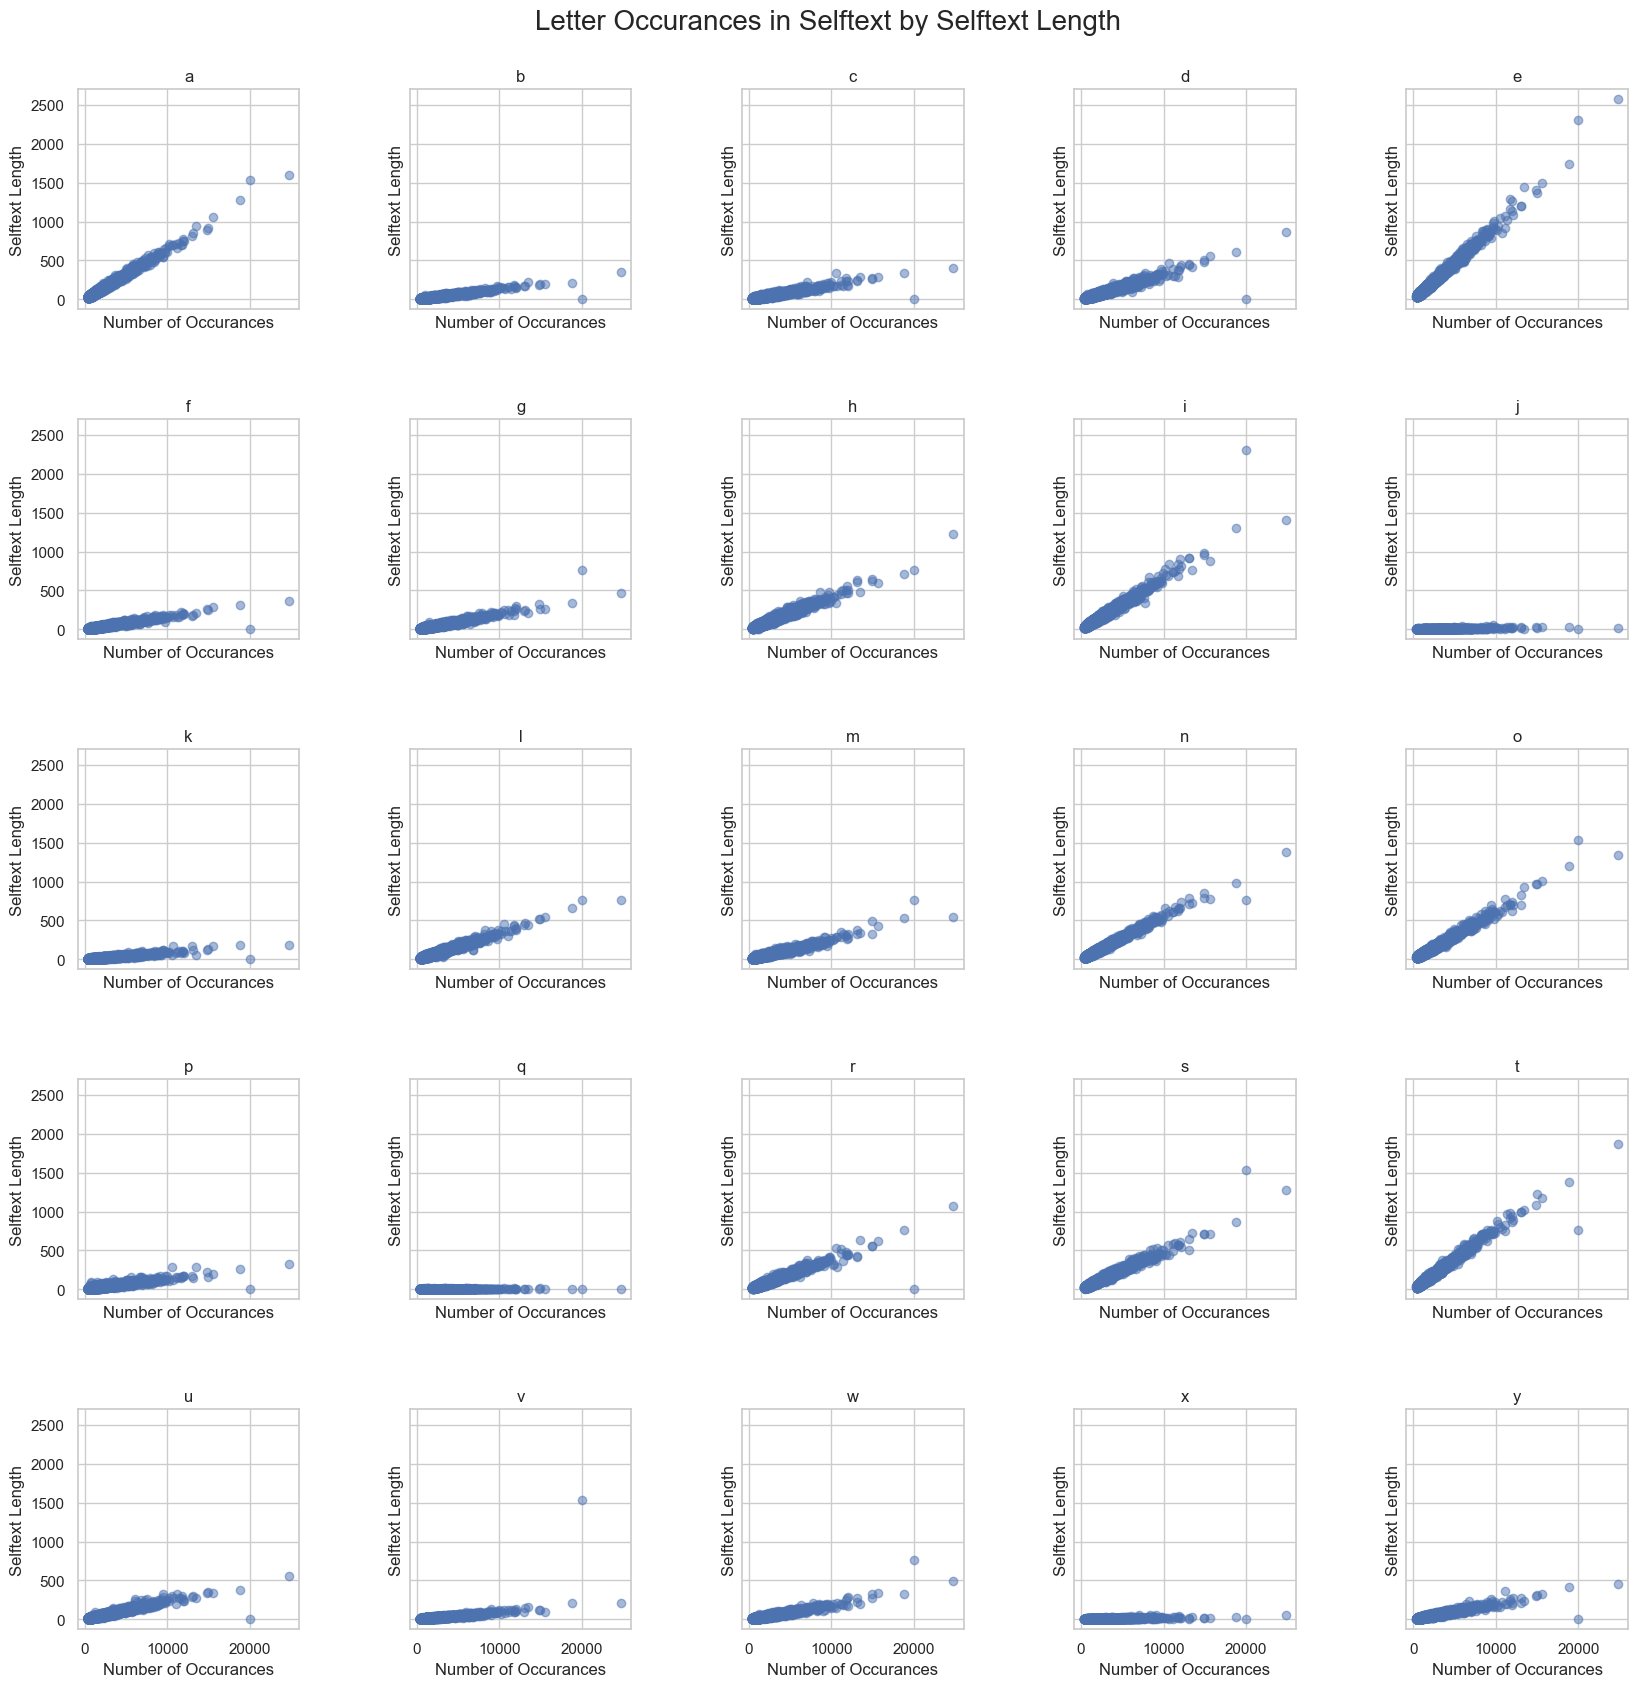

In [242]:
# make a figure plotting letters against number of occurances in selftext for each selftext length bin. To avoid the ValueError "ValueError: num must be 1 <= num <= 16, not 17" the number of bins is set to 25 instead of 26 (the number of letters in the alphabet).
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, letter in enumerate('abcdefghijklmnopqrstuvwxyz'):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df['selftext_length'], df[f'{letter}'], alpha=0.5)
        ax.set_title(letter)
        ax.set_xlabel('Number of Occurances')
        ax.set_ylabel('Selftext Length')
    except IndexError:
        pass
fig.suptitle('Letter Occurances in Selftext by Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/letter_histograms.png')
plt.show();


In [243]:
df.head(2)

author  created_utc      id  target  \
0  ChubbyMonkeyX   1539241532  9n7o85       1   
1    yognzvaidkd   1620336450  n6i6sp       1   

                                            selftext  selftext_length  \
0  really bad but not very endangering ive though...             1575   
1  a lot just happened and idk whats true can som...             1010   

   selftext_word_count    a   b   c  ...  q   r   s    t   u   v   w  x   y  z  
0                  289  117  22  42  ...  1  63  92  120  29  26  17  7  39  1  
1                  206   64  15  20  ...  0  41  45   64  23   7  21  3  19  1  

[2 rows x 33 columns]

In [244]:
# if the data/cleaned_reddit_withsentiment.csv file does not exist, run the following code to create it
# use alivebar
from alive_progress import alive_bar

# if the file already exists, skip this code block and load the file
# if the file exists but the length of the rows is not the same as the length of the rows in the cleaned_reddit.csv file, run the following code to create it
if not os.path.exists('../data/cleaned_reddit_withsentiment.csv') or os.path.getsize('../data/cleaned_reddit_withsentiment.csv') != os.path.getsize('../data/cleaned_reddit.csv'):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    # if the file has a sentiment column, then use that value for each row in the sentiment column (we are just missing some rows)
    # for each row in df, get the sentiment value from the sentiment column and add it to the row in the sentiment column for the new dataframe
    # if the sentiment column does not exist, then use the sentiment value from the sentiment_analysis function
    with alive_bar(len(df)) as bar:
        for i, row in df.iterrows():
            try:
                # load compound, pos, neu, neg values from the sentiment columns in df
                compound = row['sentiment']
                pos = row['positive']
                neu = row['neutral']
                neg = row['negative']
            except KeyError:
                # if the sentiment column does not exist, then use the sentiment value from the sentiment_analysis function
                compound, pos, neu, neg = analyzer.polarity_scores(row['selftext'])['compound'], analyzer.polarity_scores(row['selftext'])['pos'], analyzer.polarity_scores(row['selftext'])['neu'], analyzer.polarity_scores(row['selftext'])['neg']
            # add the sentiment values to the new dataframe
            df.loc[i, 'sentiment'] = compound
            df.loc[i, 'positive'] = pos
            df.loc[i, 'neutral'] = neu
            df.loc[i, 'negative'] = neg
            
            bar()
    # save the data to a csv
    df.to_csv('../data/cleaned_reddit_withsentiment.csv', index=False)
df.head()


|████████████████████████████████████████| 12544/12544 [100%] in 5:14.7 (39.86/s) 


author  created_utc      id  target  \
0    ChubbyMonkeyX   1539241532  9n7o85       1   
1      yognzvaidkd   1620336450  n6i6sp       1   
2         kiranode   1554270592  b8u505       0   
3           b50142   1560436373  c06jok       0   
4  AccountForMyOCD   1558730325  bsly2g       1   

                                            selftext  selftext_length  \
0  really bad but not very endangering ive though...             1575   
1  a lot just happened and idk whats true can som...             1010   
2  first group therapy session still stressed out...             1511   
3  participants needed support workers healthcare...             1574   
4  just as i thought i was doing better i encount...              810   

   selftext_word_count    a   b   c  ...   u   v   w  x   y  z  sentiment  \
0                  289  117  22  42  ...  29  26  17  7  39  1    -0.9833   
1                  206   64  15  20  ...  23   7  21  3  19  1     0.8402   
2                  291   93  17  28  ...  41  10  24  2  33  0    -0.9527   
3                  226  107  13  45  ...  47  21  15  2  29  2     0.9749   
4                  164   61  12  23  ...  18   5  17  4  22  0     0.9487   

   positive  neutral  negative  
0     0.096    0.735     0.169  
1     0.160    0.720     0.121  
2     0.088    0.775     0.138  
3     0.166    0.769     0.065  
4     0.163    0.755     0.083  

[5 rows x 37 columns]

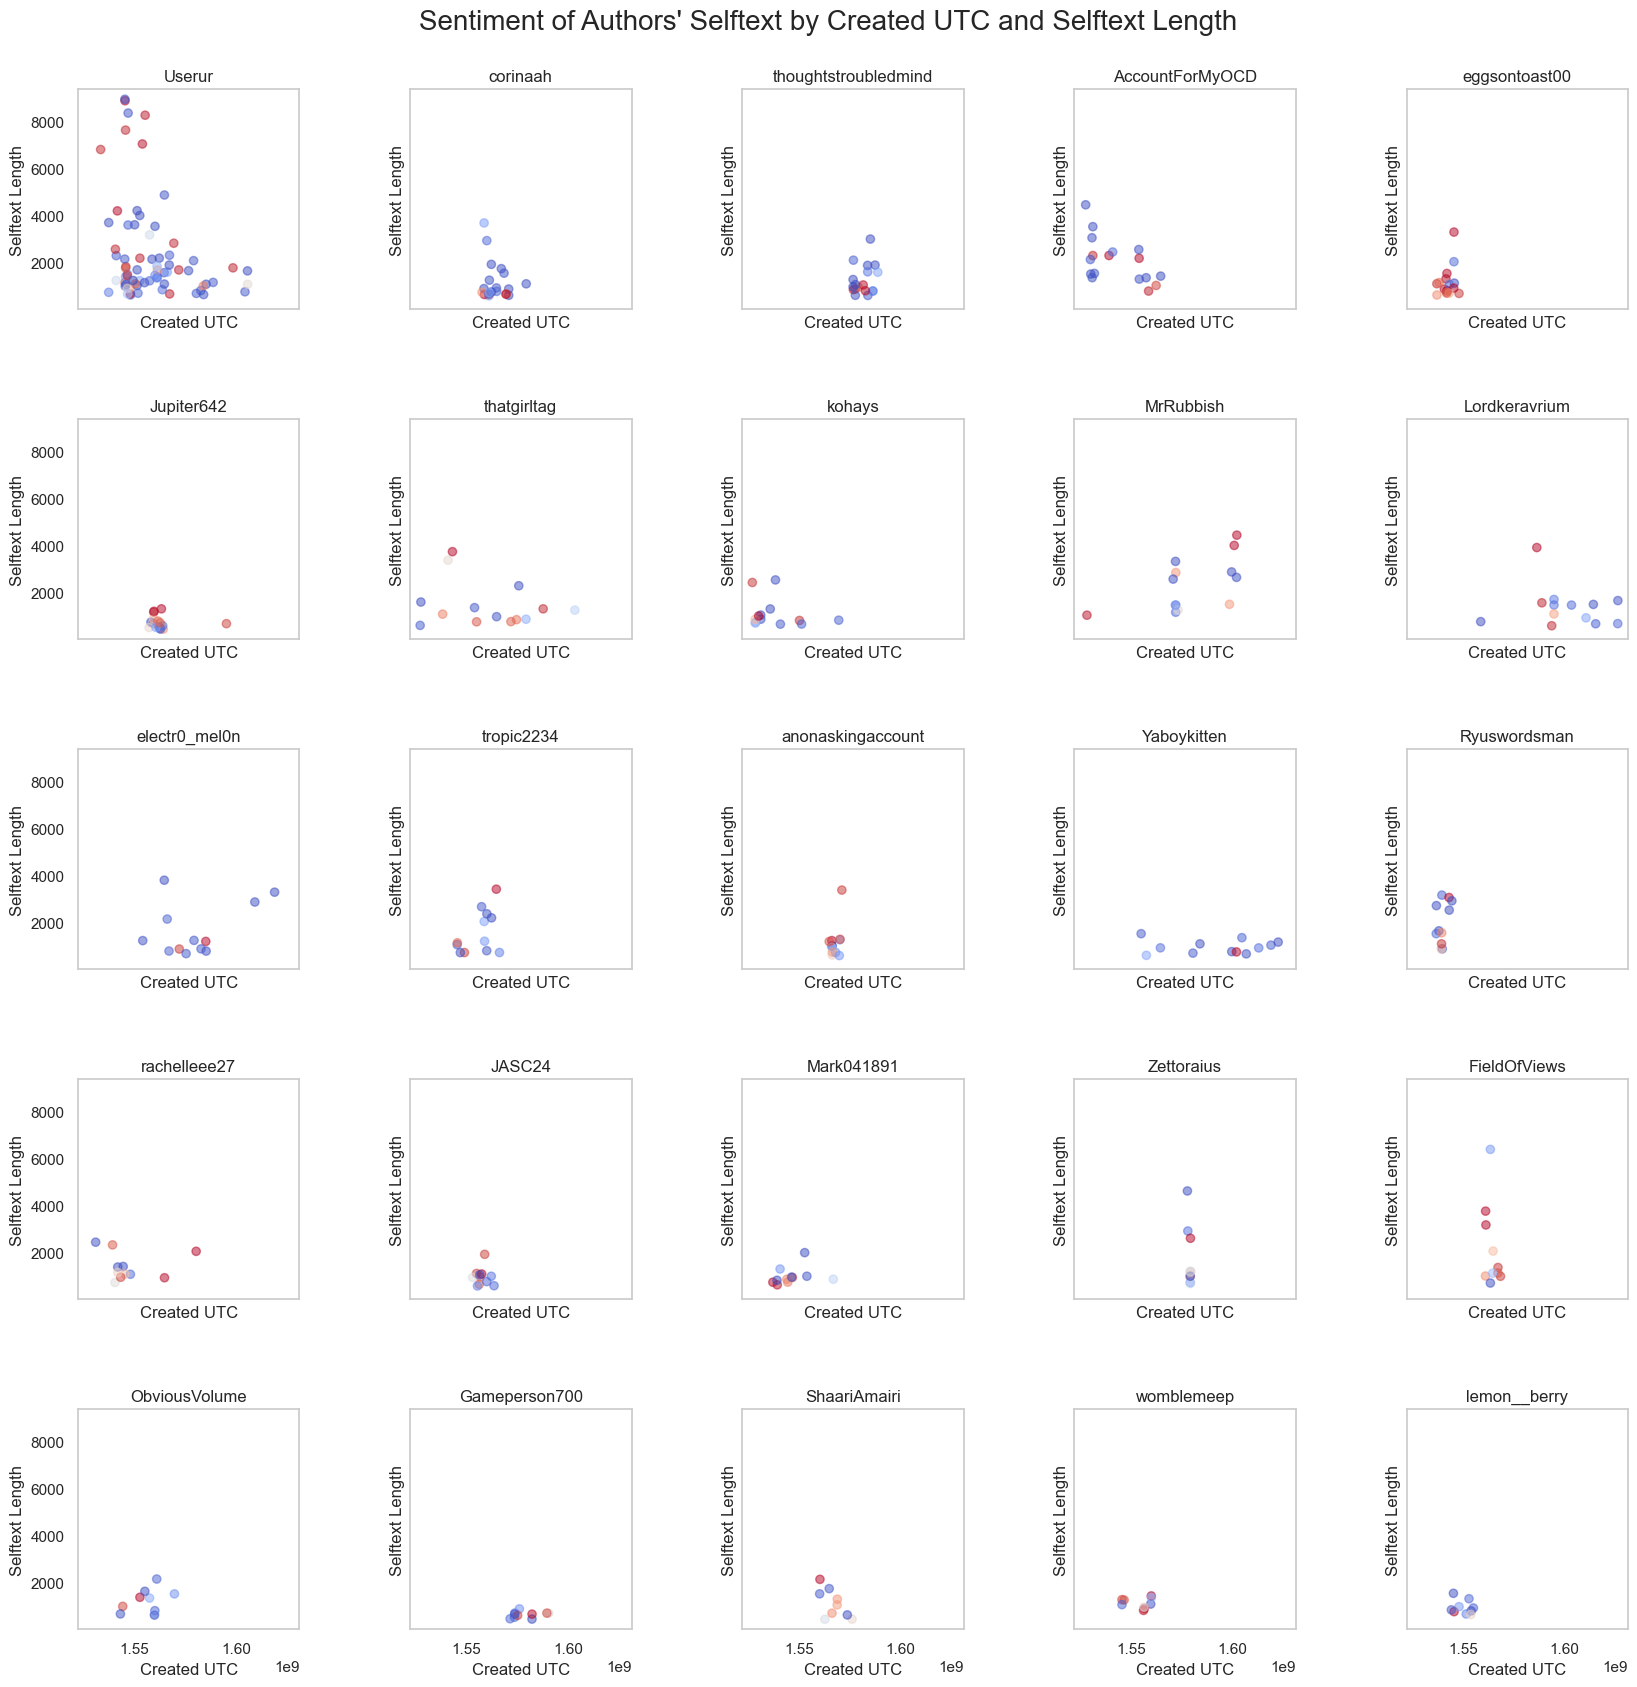

In [245]:
# plot the sentiment values for the top 25 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:25]):
    try:
        ax = axes[i//5, i%5]
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author.png')
plt.show();

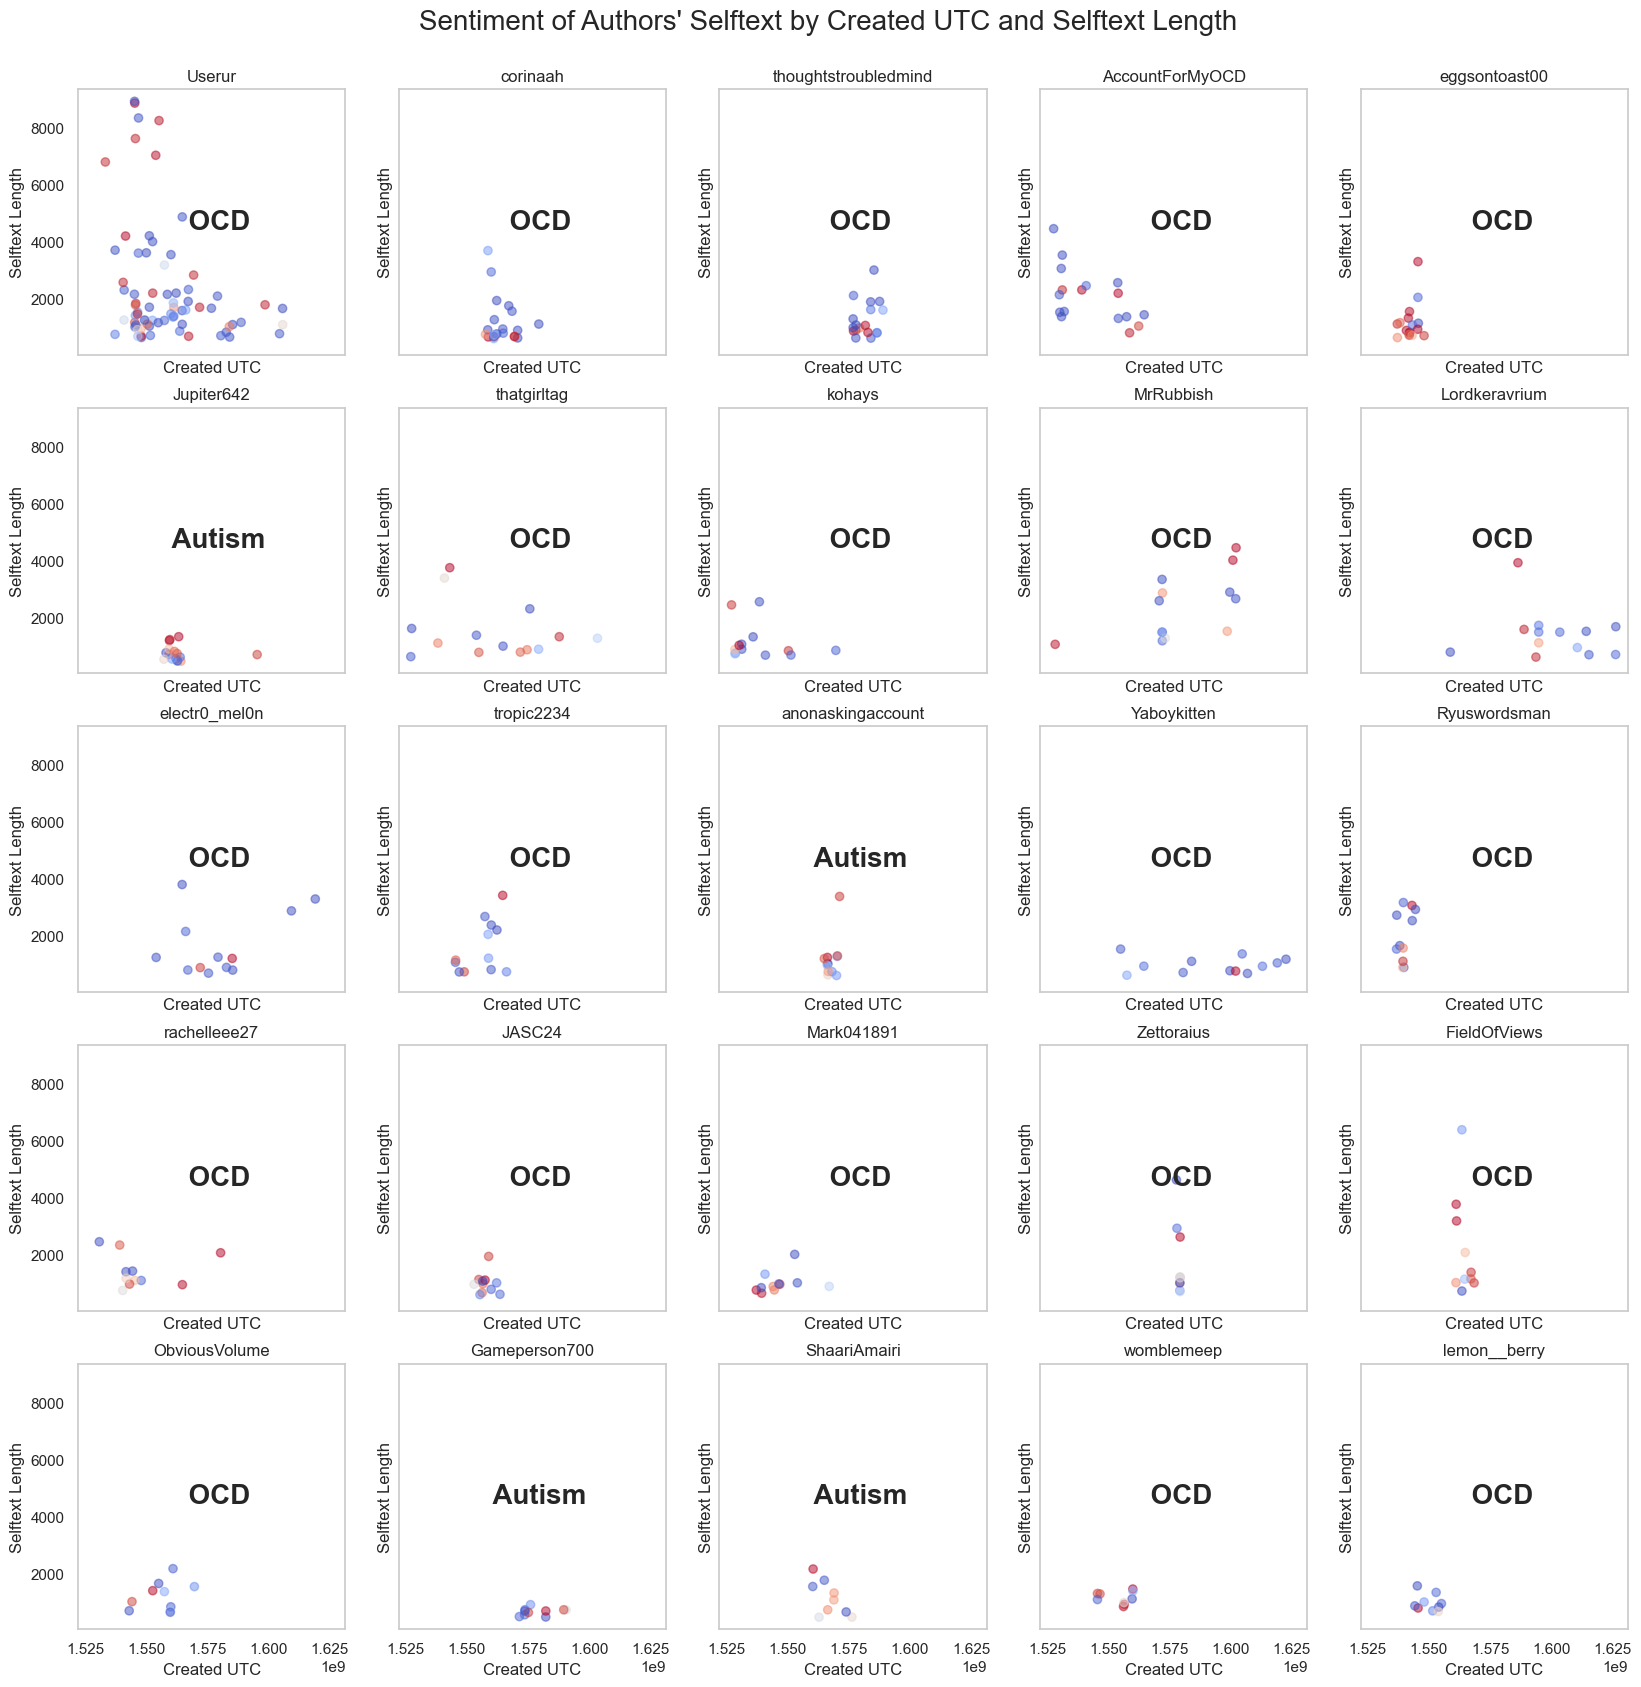

In [246]:
# plot the sentiment values for the top 25 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.

fig, axes = plt.subplots(5, 5, figsize=(20,20), sharey=True, sharex=True)
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:25]):
    try:
        ax = axes[i//5, i%5]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            ax.text(0.5, 0.5, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
        else:
            ax.text(0.5, 0.5, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, fontweight='bold')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author_with_target.png')
plt.show();

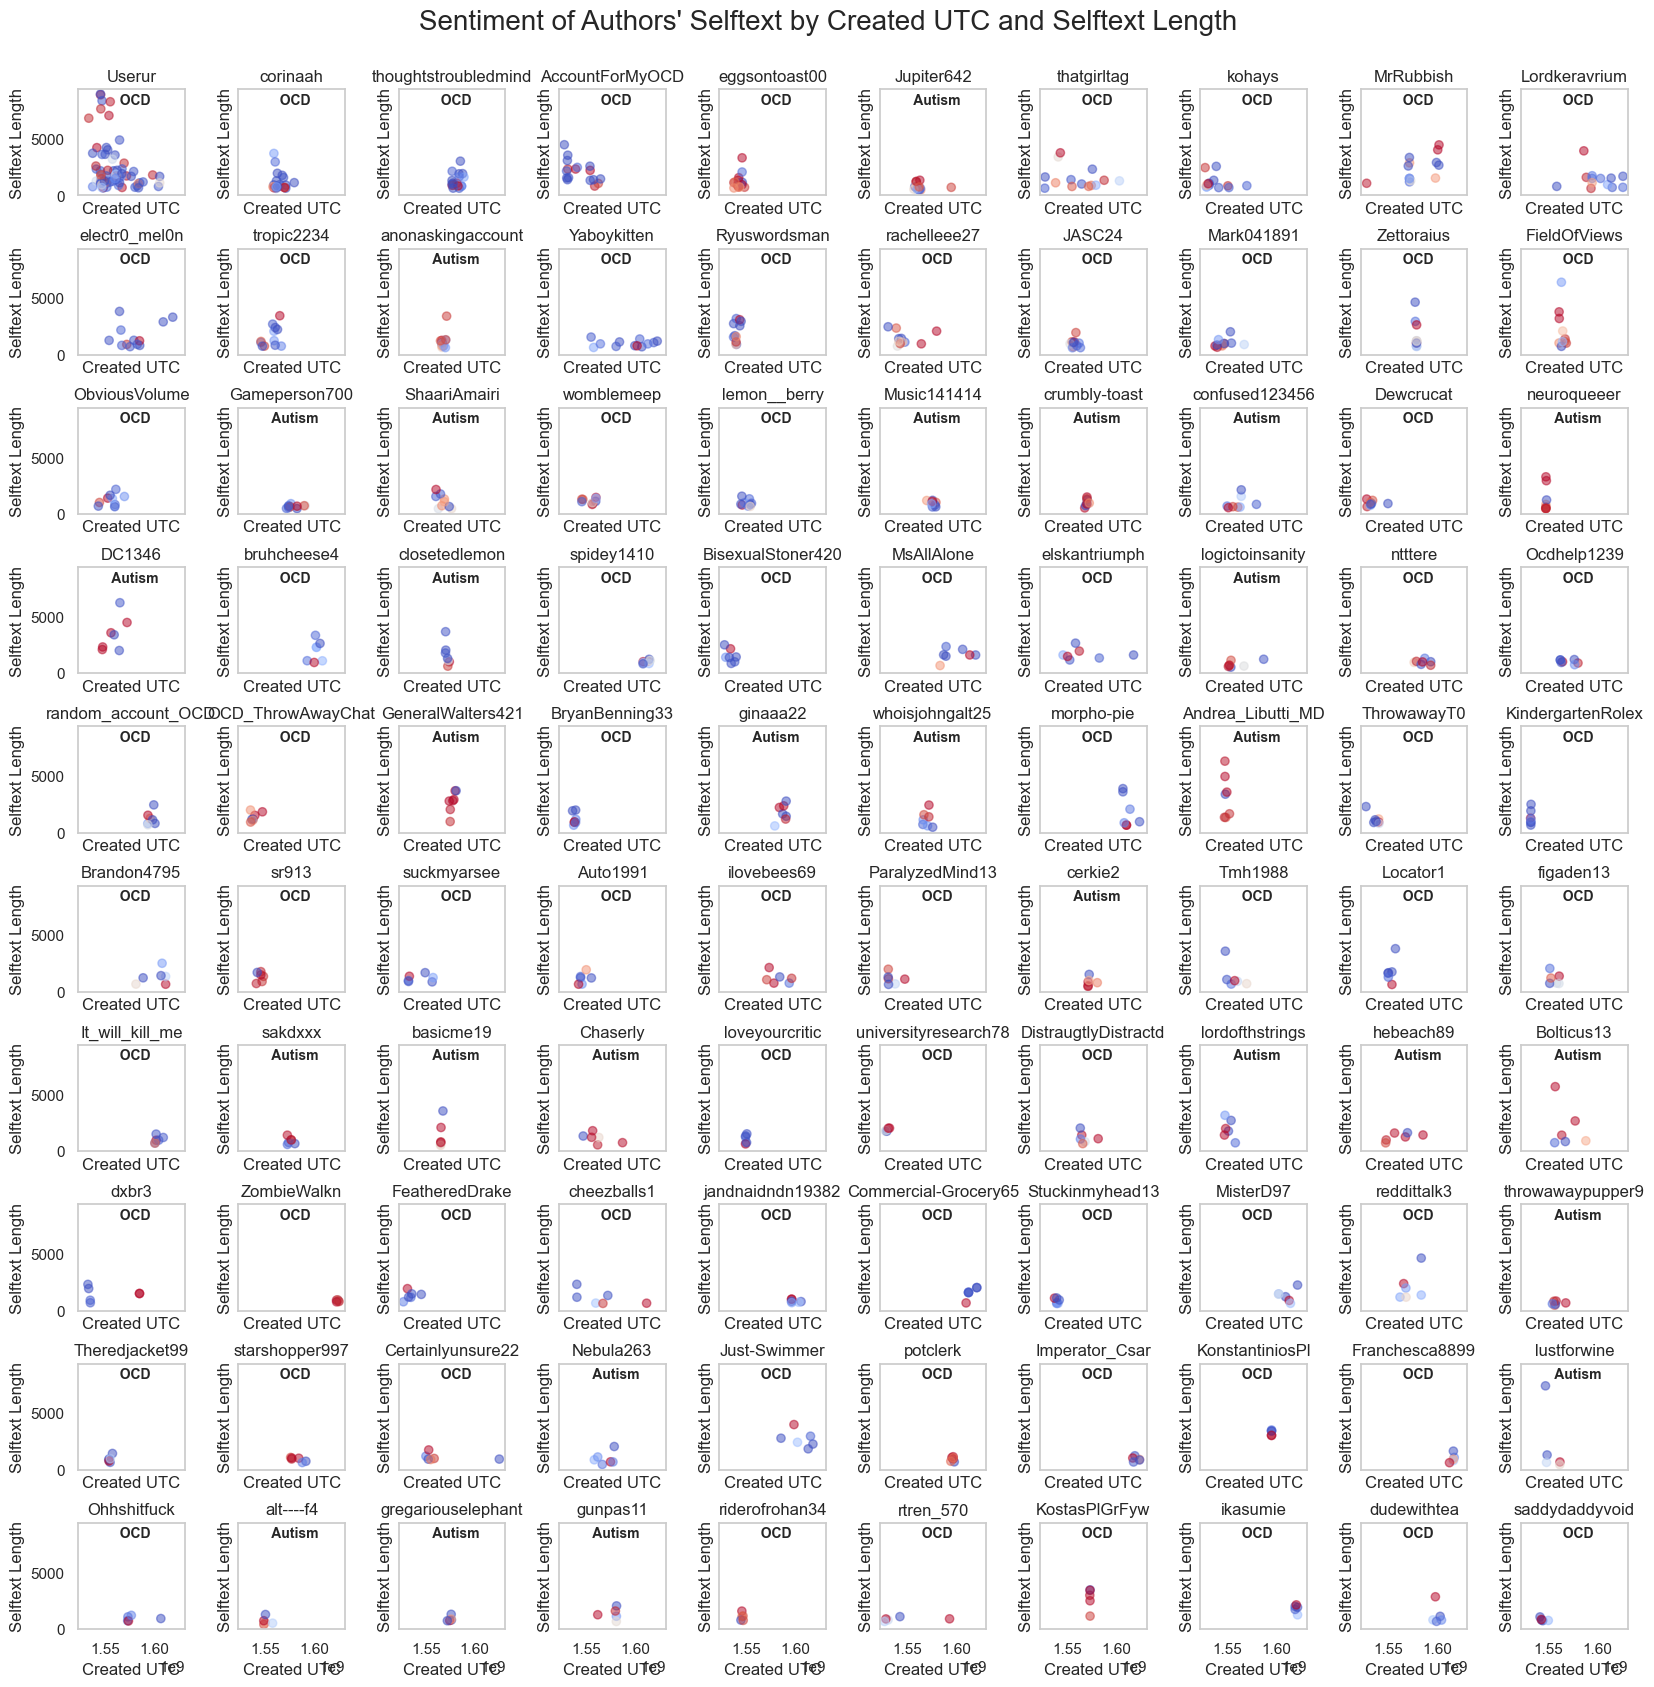

In [247]:
# plot the sentiment values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:100]):
    try:
        ax = axes[i//10, i%10]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='coolwarm', alpha=0.5)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            # align text horizontally at the center of the plot and vertically at the top of the plot
            ax.text(0.5, 0.9, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        else:
            ax.text(0.5, 0.9, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
plt.savefig('../images/sentiment_by_author_with_target_100.png')
plt.show();

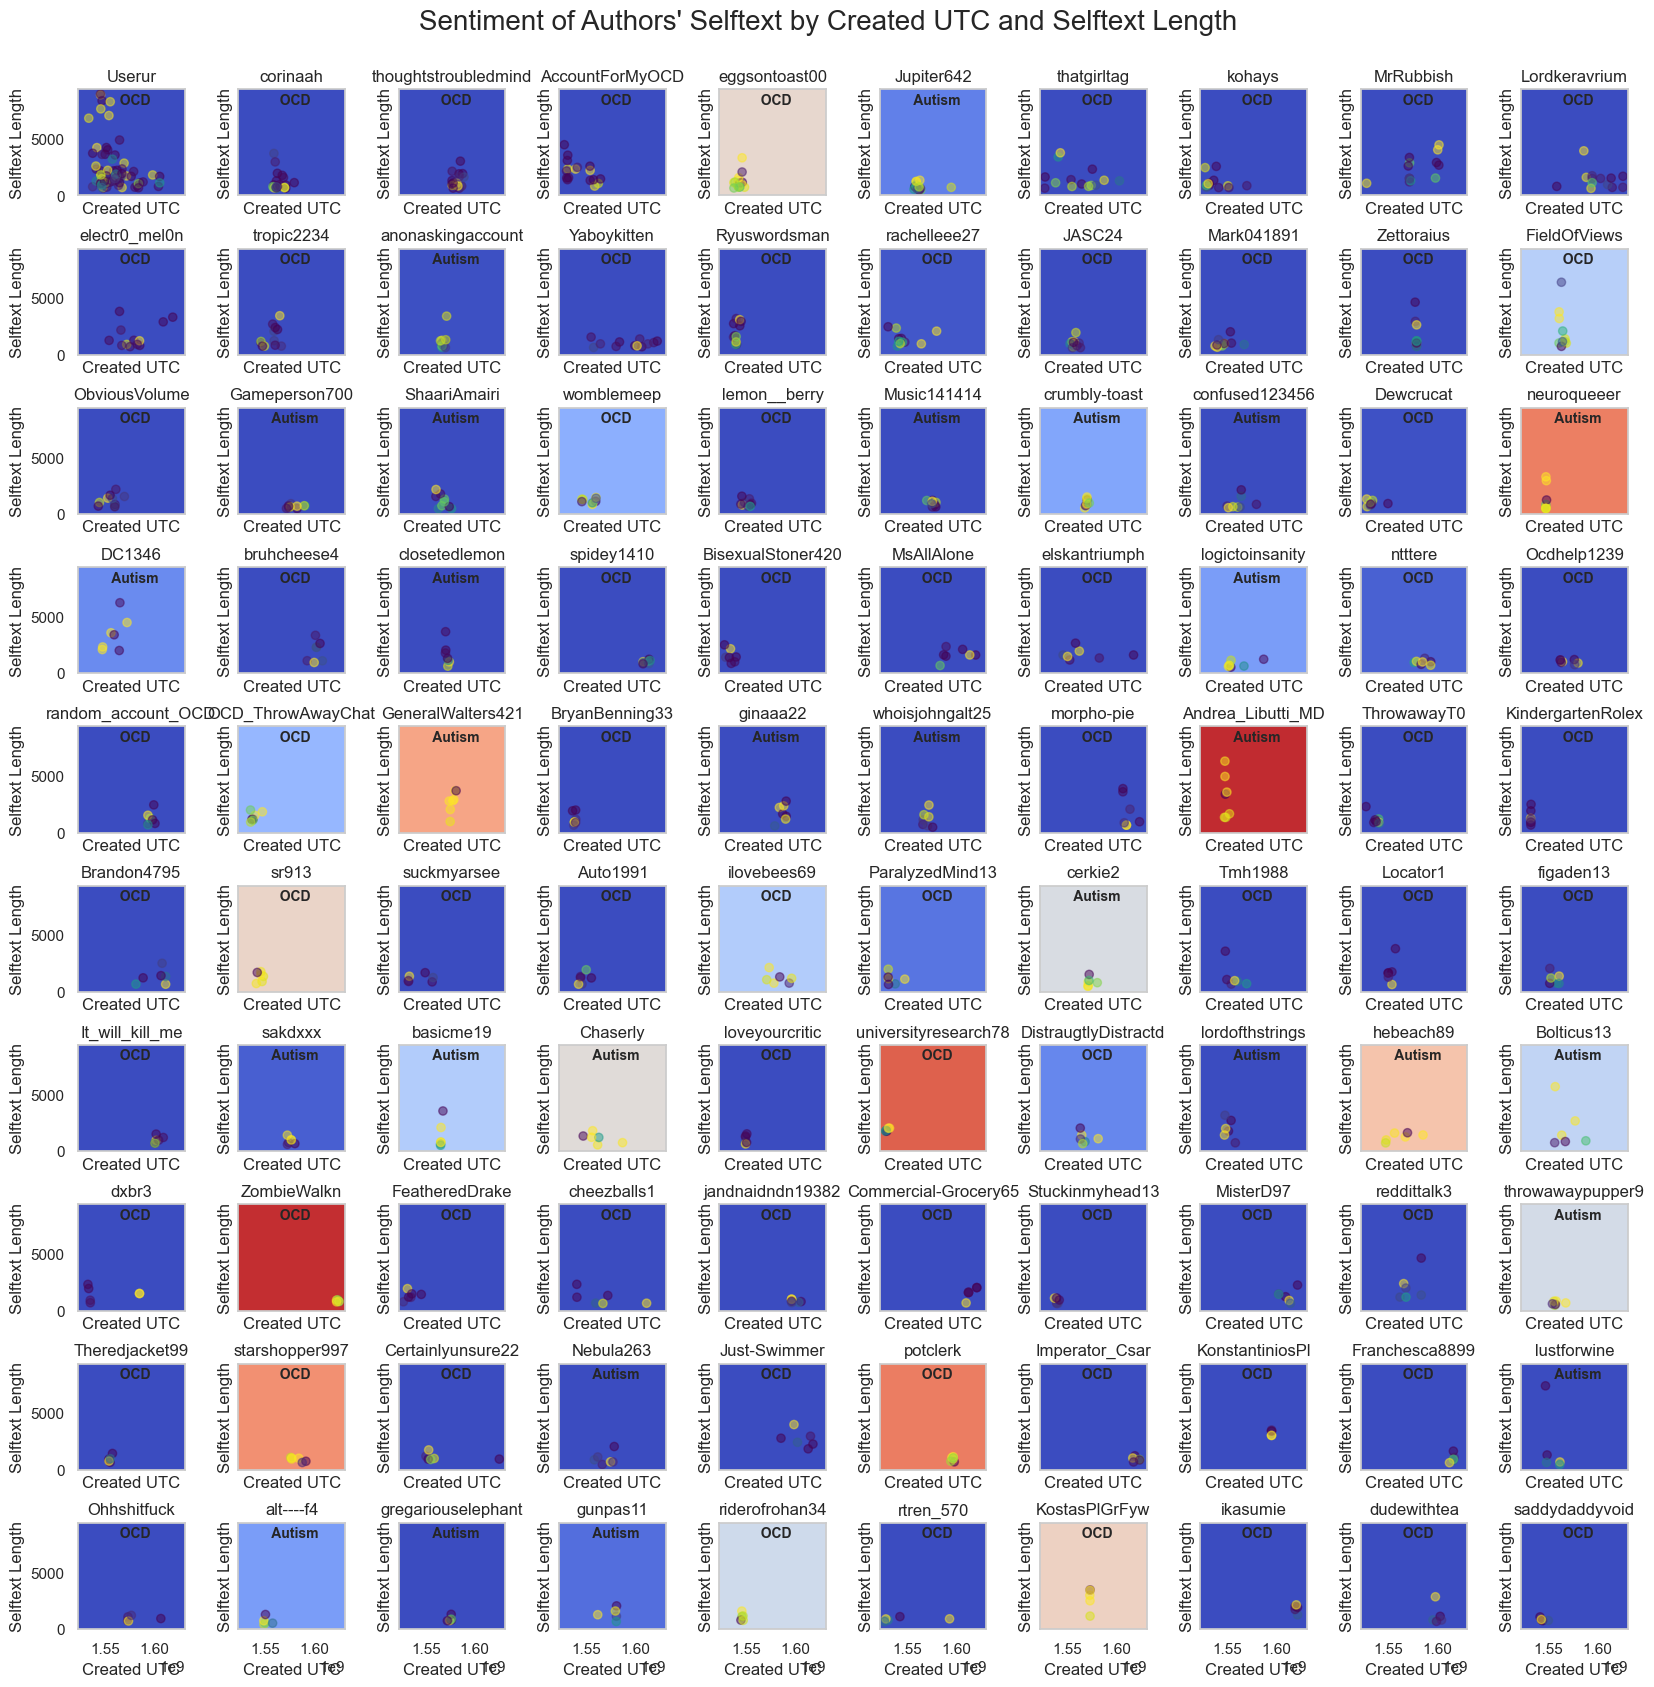

In [248]:
# plot the sentiment values for the top 100 authors (by number of posts) on their own subplots as scatterplots with the x-axis being the created_utc, y-axis being the selftext_length, and color representing the sentiment value column.
# add a space between the plots to make them easier to read and to make the plot more aesthetically pleasing
# for this code block ignore the IndexError
# use coolwarm for the color map to make the colors more distinct
# add an annotation to each plot that shows the target value for that author (0 or 1) but for 1 show the text 'OCD' and for 0 show the text 'Autism' (this is the target column in the df) and make the text larger and bold.
# make the background color of each plot correspond to the average sentiment value for that author in the `sentiment` column (this is the average sentiment value for all of the posts by that author) use the following color map: 'coolwarm' (this is the same color map used for the scatterplots)
# make the background color of the plot lighter if the average sentiment value is closer to 0 and darker if the average sentiment value is closer to 1

fig, axes = plt.subplots(10, 10, figsize=(20,20), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# the suptitle should not have so much space between it and the subplots
# the x and y labels should be larger
for i, author in enumerate(df['author'].value_counts().index[:100]):
    try:
        ax = axes[i//10, i%10]
        ax.scatter(df[df['author']==author]['created_utc'], df[df['author']==author]['selftext_length'], c=df[df['author']==author]['sentiment'], cmap='viridis', alpha=0.5)
        # add a colorbar to the plot and label it 'Sentiment' (this is the sentiment column in the df)
        ax.set_title(author)
        ax.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
        ax.set_xlabel('Created UTC')
        ax.set_ylabel('Selftext Length')
        if df[df['author']==author]['target'].values[0] == 1:
            # align text horizontally at the center of the plot and vertically at the top of the plot
            ax.text(0.5, 0.9, '  OCD', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        else:
            ax.text(0.5, 0.9, '  Autism', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, fontweight='bold')
        ax.set_facecolor(plt.cm.coolwarm(df[df['author']==author]['sentiment'].mean()))
        # colorbar
        # label
    except IndexError:
        pass
fig.suptitle('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20, y=0.92)
# add a legend
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();

In [249]:
# plot selftext length vs created UTC on one scatterplot
# color - the author
# size - number of posts by that author (total number of posts in the df)
df['posts_by_author'] = df['author'].map(df['author'].value_counts()) # add a column to the df that shows the number of posts by each author
# give each author a random unique hex color code i.e. '#aabbcc' for the first author, '#ffe111' for the second author, etc. (this will be used for the color of the points on the scatterplot)
# use the following color map: 'coolwarm'
import random # this is used to generate random hex color codes
def random_color():
    return '#%06x' % random.randint(0, 0xFFFFFF) # this will generate a random hex color code
df['author_color'] = df['author'].map({author: random_color() for author in df['author'].unique()}) # add a column to the df that shows the color for each author

# sample
df.head()

author  created_utc      id  target  \
0    ChubbyMonkeyX   1539241532  9n7o85       1   
1      yognzvaidkd   1620336450  n6i6sp       1   
2         kiranode   1554270592  b8u505       0   
3           b50142   1560436373  c06jok       0   
4  AccountForMyOCD   1558730325  bsly2g       1   

                                            selftext  selftext_length  \
0  really bad but not very endangering ive though...             1575   
1  a lot just happened and idk whats true can som...             1010   
2  first group therapy session still stressed out...             1511   
3  participants needed support workers healthcare...             1574   
4  just as i thought i was doing better i encount...              810   

   selftext_word_count    a   b   c  ...   w  x   y  z  sentiment  positive  \
0                  289  117  22  42  ...  17  7  39  1    -0.9833     0.096   
1                  206   64  15  20  ...  21  3  19  1     0.8402     0.160   
2                  291   93  17  28  ...  24  2  33  0    -0.9527     0.088   
3                  226  107  13  45  ...  15  2  29  2     0.9749     0.166   
4                  164   61  12  23  ...  17  4  22  0     0.9487     0.163   

   neutral  negative  posts_by_author  author_color  
0    0.735     0.169                1       #e10fb6  
1    0.720     0.121                3       #52d076  
2    0.775     0.138                1       #8576de  
3    0.769     0.065                2       #d37eb6  
4    0.755     0.083               17       #1876ff  

[5 rows x 39 columns]

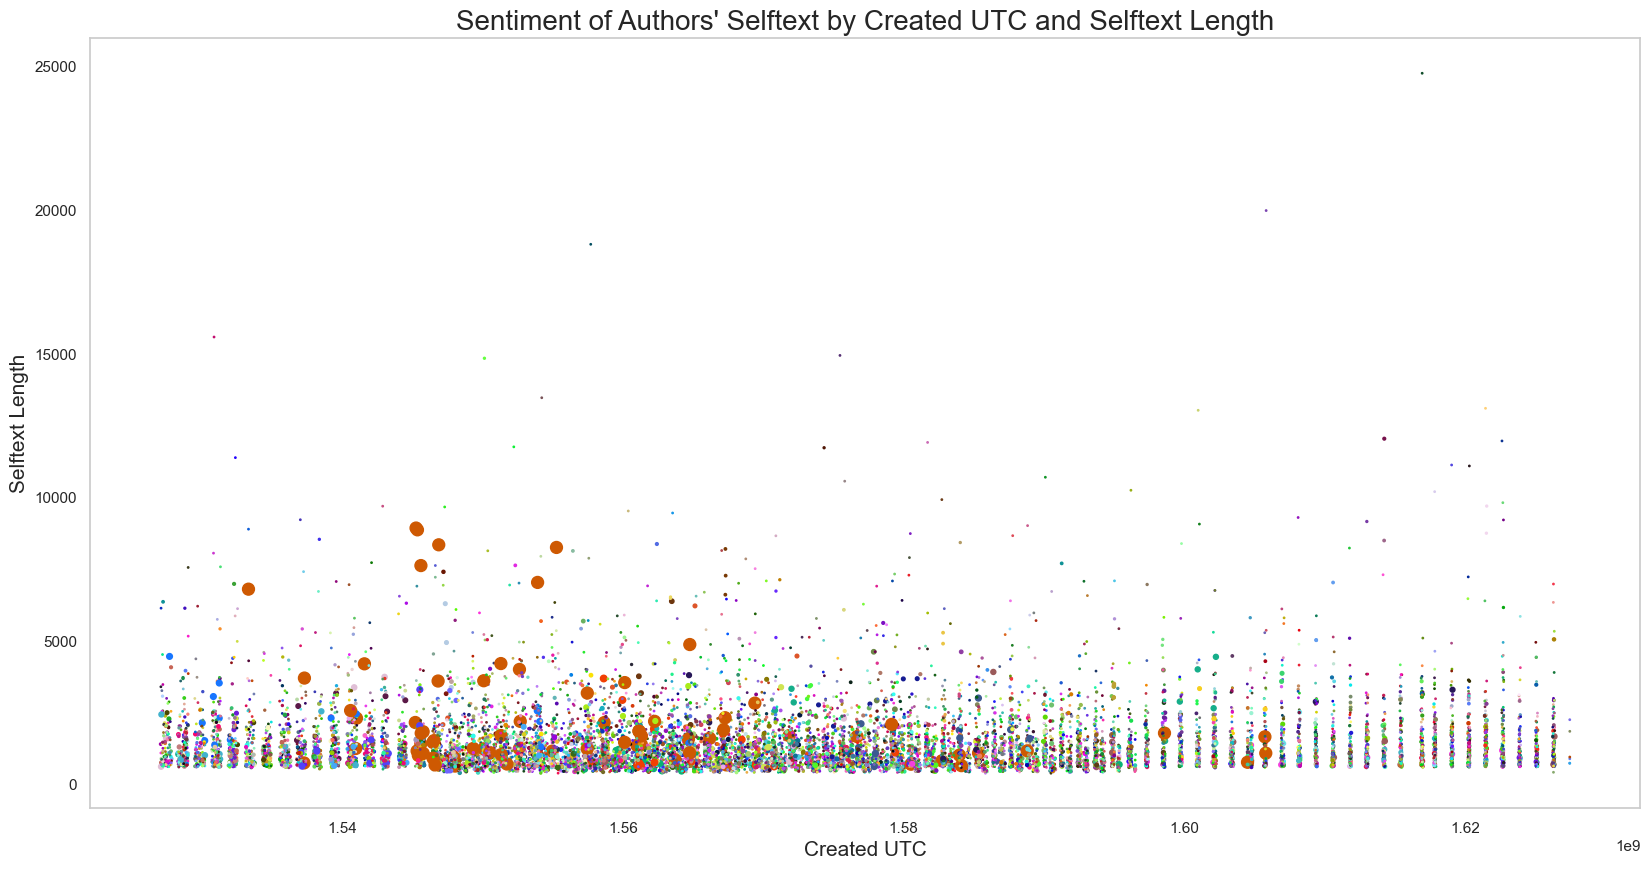

In [250]:
# plot selftext length vs created UTC on one scatterplot
# color - author_color column (a hex color code for each author)
# size - number of posts by that author (total number of posts in the df)
df['posts_by_author'] = df['author'].map(df['author'].value_counts()) # add a column to the df that shows the number of posts by each author
# alpha - the sentiment value for that post (this is the sentiment column in the df)
# make the size of each point correspond to the number of posts by that author (this is the total number of posts in the df)
# make the alpha of each point correspond to the sentiment value for that post (this is the sentiment column in the df)
# do not add a colorbar to the plot
# add a legend to the plot
# add a title to the plot
# add a label to the x-axis
# add a label to the y-axis

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'])
plt.title('Sentiment of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.ylabel('Selftext Length', fontsize=15)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();


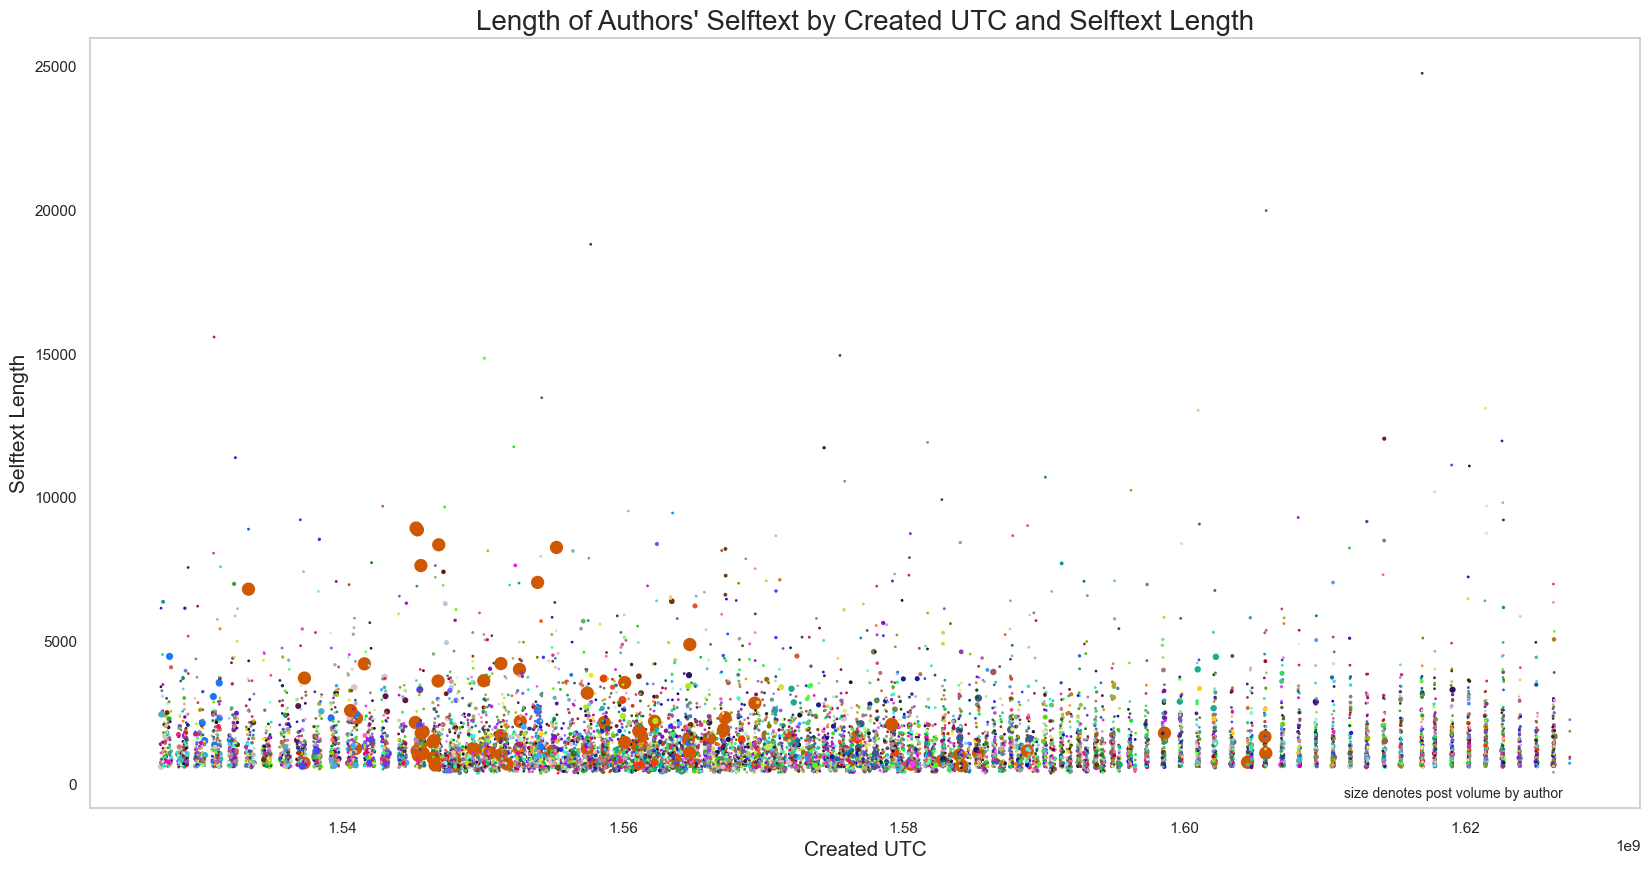

In [251]:

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'])
plt.title('Length of Authors\' Selftext by Created UTC and Selftext Length', fontsize=20)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
# annotate the plot with the notation "size denotes post volume by author" (place this annotation in the bottom right corner of the plot)
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.savefig('../images/sentiment_by_author_with_target_100_colored.png')
plt.show();

This plot shows that we have outliers in our dataset. Let's add a line to the plot to show both the mean and median lengths of the posts.

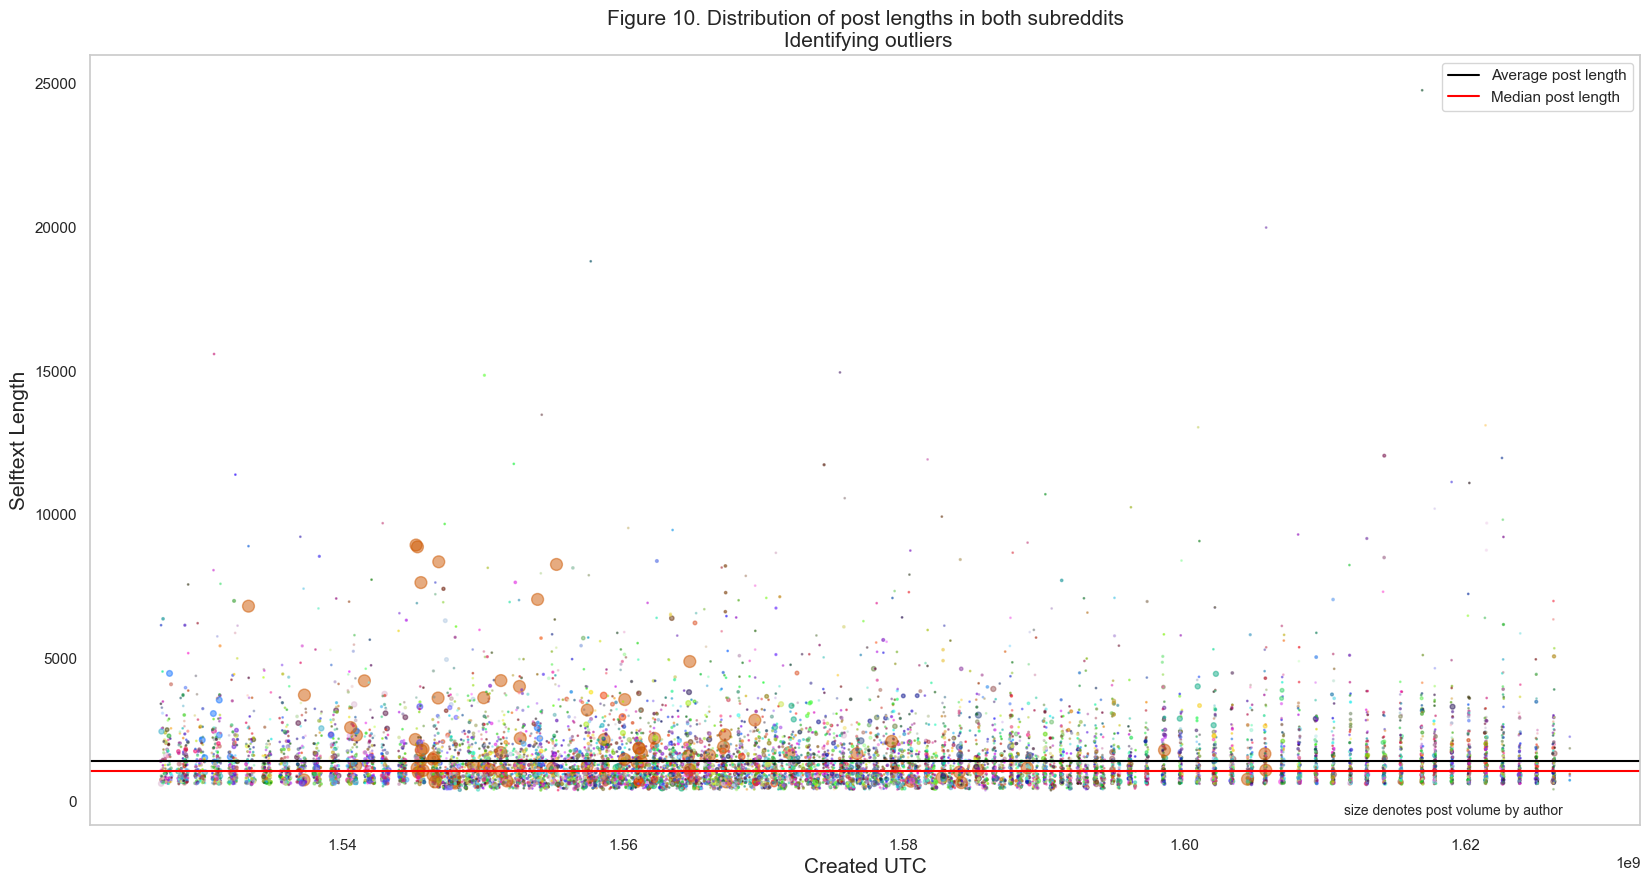

In [252]:
# repeat the plot above but add two horizontal lines to the plot that show:
# 1. the average selftext length for the OCD and Autism subreddits (together) - black line
# 2. the median selftext length for the OCD and Autism subreddits (together) - red line
# also, keep colors the same as before but fade them by 0.5 (i.e. make them 50% transparent) so that the lines are more visible

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 10. Distribution of post lengths in both subreddits\n Identifying outliers', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
mean_val_preoutlier_removal = df['selftext_length'].mean()
median_val_preoutlier_removal = df['selftext_length'].median()
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length')
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length')
plt.legend()
plt.savefig('../images/figure_10.png')
plt.show();

What about the distribution of the number of words in each post? Let's plot that too.


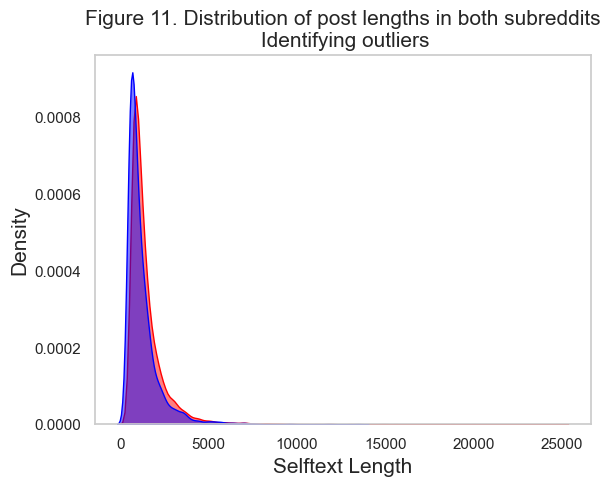

In [253]:
# repeat the plot above (using seaborn) but add a density plot to the plot that shows the distribution of selftext length for the OCD and Autism subreddits (together) - orange filled area (use matplotlib) - this will be the background of the plot (i.e. the density plot will be the background of the plot) - make the density plot transparent by 0.5 (i.e. make it 50% transparent) so that the points are more visible - make the density plot have a black outline

import seaborn as sns
sns.set(style="whitegrid")
# set the area of the plot to focus on the data (i.e. remove the whitespace around the data)
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the size of the plot to 20 inches by 10 inches

# add 'ocd_selftext_length' and 'autism_selftext_length' columns to the df
df['ocd_selftext_length'] = df[df['target']==1]['selftext_length']
df['autism_selftext_length'] = df[df['target']==0]['selftext_length']




fig = sns.kdeplot(df['ocd_selftext_length'], shade=True, color='red', alpha=0.5)
fig = sns.kdeplot(df['autism_selftext_length'], shade=True, color='blue', alpha=0.5)
plt.title('Figure 11. Distribution of post lengths in both subreddits\n Identifying outliers', fontsize=15)
plt.xlabel('Selftext Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.show();





## Using IQR to remove outliers from the dataset.

In [254]:
IQR = df['selftext_length'].quantile(0.75) - df['selftext_length'].quantile(0.25) # calculate the interquartile range
lower_bound = df['selftext_length'].quantile(0.25) - (1.5 * IQR) # calculate the lower bound
upper_bound = df['selftext_length'].quantile(0.75) + (1.5 * IQR) # calculate the upper bound
print(f'lower bound: {lower_bound} characters in selftext')
print(f'upper bound: {upper_bound} characters in selftext')

# remove outliers from the df
print(f'number of rows in df before removing outliers: {df.shape[0]}')
preshape = df.shape[0]
df = df[(df['selftext_length'] > lower_bound) & (df['selftext_length'] < upper_bound)]
print(f'number of rows in df after removing outliers: {df.shape[0]}')
print(f'number of rows removed: {preshape - df.shape[0]}')
outliers_removed = preshape - df.shape[0]


lower bound: -469.0 characters in selftext
upper bound: 2827.0 characters in selftext
number of rows in df before removing outliers: 12544
number of rows in df after removing outliers: 11586
number of rows removed: 958


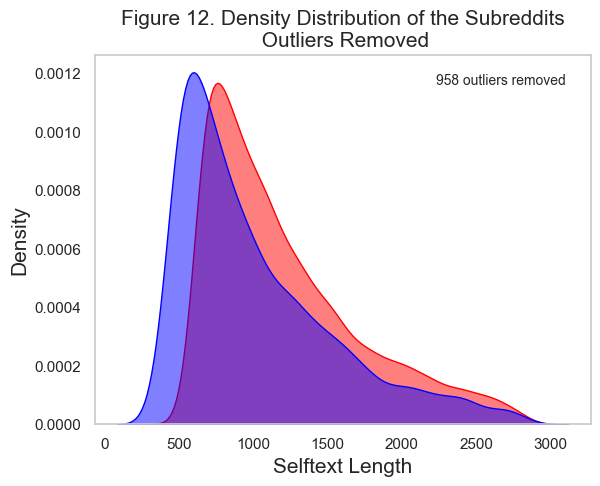

In [255]:
# repeat the plot above (using seaborn) but add a density plot to the plot that shows the distribution of selftext length for the OCD and Autism subreddits (together) - orange filled area (use matplotlib) - this will be the background of the plot (i.e. the density plot will be the background of the plot) - make the density plot transparent by 0.5 (i.e. make it 50% transparent) so that the points are more visible - make the density plot have a black outline

import seaborn as sns
sns.set(style="whitegrid")
# set the area of the plot to focus on the data (i.e. remove the whitespace around the data)
# set the background color of the plot to white
# set the style of the plot to whitegrid
# set the size of the plot to 20 inches by 10 inches

# add 'ocd_selftext_length' and 'autism_selftext_length' columns to the df
df['ocd_selftext_length'] = df[df['target']==1]['selftext_length']
df['autism_selftext_length'] = df[df['target']==0]['selftext_length']




fig = sns.kdeplot(df['ocd_selftext_length'], shade=True, color='red', alpha=0.5)
fig = sns.kdeplot(df['autism_selftext_length'], shade=True, color='blue', alpha=0.5)
plt.title('Figure 12. Density Distribution of the Subreddits\n Outliers Removed', fontsize=15)
# annotate with outlier removal information in top right corner
plt.annotate(f'{outliers_removed} outliers removed', xy=(0.95, 0.95), xycoords='axes fraction', horizontalalignment='right', verticalalignment='top', fontsize=10)
plt.xlabel('Selftext Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
# save the figure
plt.savefig('../images/figure_12.png')
plt.show();





Now let's repeat the plot from earlier.

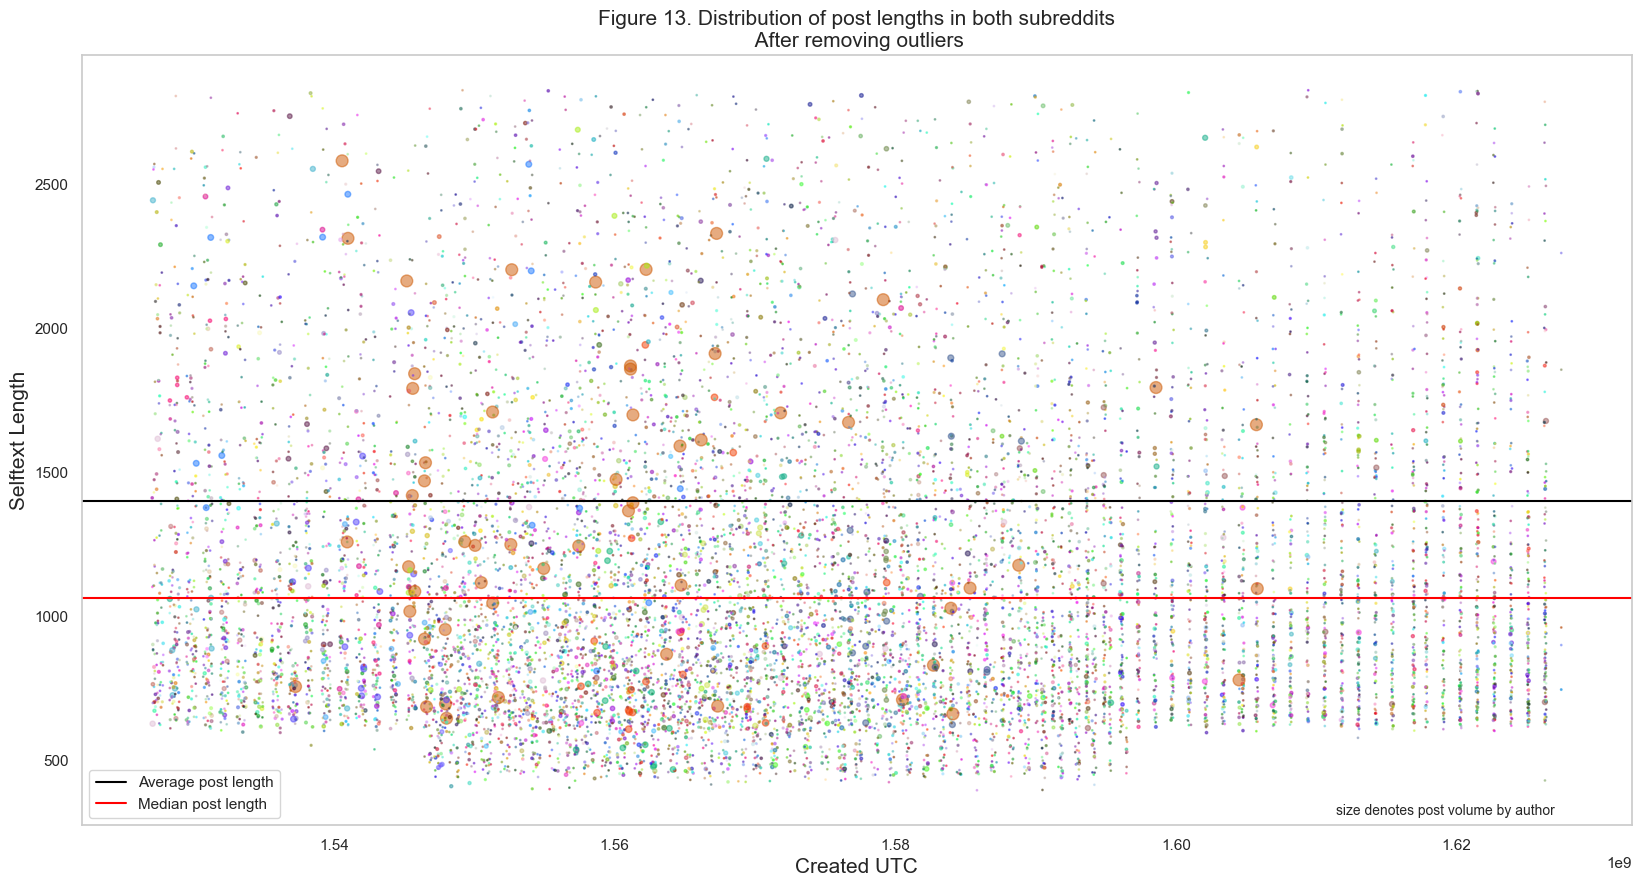

In [256]:
# repeat the plot above but add two horizontal lines to the plot that show:
# 1. the average selftext length for the OCD and Autism subreddits (together) - black line
# 2. the median selftext length for the OCD and Autism subreddits (together) - red line
# also, keep colors the same as before but fade them by 0.5 (i.e. make them 50% transparent) so that the lines are more visible

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 13. Distribution of post lengths in both subreddits\n After removing outliers', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length') # using the previously calculated mean value of the selftext length
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length') # using the previously calculated median value of the selftext length
plt.legend()
plt.savefig('../images/figure_13.png')
plt.show();

There is a dip in the selftext lengths around UTC 1.5475 that lasts to about 1.598. This needs to be investigated before modeling.

In [257]:
# How many posts have selftext length greater than the median selftext length for the OCD and Autism subreddits (together)?
long_posts_count = df[df['selftext_length'] > median_val_preoutlier_removal].shape[0]
print(f'number of posts with selftext length greater than the median selftext length for the OCD and Autism subreddits (together): {long_posts_count}')
# what is the length of the shortest post created before 1540000000 UTC ?
shortest_post_length = df[df['created_utc'] < 1540000000]['selftext_length'].min()
print(f'length of the shortest post created before 1540000000 UTC: {shortest_post_length} characters')

number of posts with selftext length greater than the median selftext length for the OCD and Autism subreddits (together): 5309
length of the shortest post created before 1540000000 UTC: 552 characters


In [258]:
df.head()

author  created_utc      id  target  \
0    ChubbyMonkeyX   1539241532  9n7o85       1   
1      yognzvaidkd   1620336450  n6i6sp       1   
2         kiranode   1554270592  b8u505       0   
3           b50142   1560436373  c06jok       0   
4  AccountForMyOCD   1558730325  bsly2g       1   

                                            selftext  selftext_length  \
0  really bad but not very endangering ive though...             1575   
1  a lot just happened and idk whats true can som...             1010   
2  first group therapy session still stressed out...             1511   
3  participants needed support workers healthcare...             1574   
4  just as i thought i was doing better i encount...              810   

   selftext_word_count    a   b   c  ...   y  z  sentiment  positive  neutral  \
0                  289  117  22  42  ...  39  1    -0.9833     0.096    0.735   
1                  206   64  15  20  ...  19  1     0.8402     0.160    0.720   
2                  291   93  17  28  ...  33  0    -0.9527     0.088    0.775   
3                  226  107  13  45  ...  29  2     0.9749     0.166    0.769   
4                  164   61  12  23  ...  22  0     0.9487     0.163    0.755   

   negative  posts_by_author  author_color  ocd_selftext_length  \
0     0.169                1       #e10fb6               1575.0   
1     0.121                3       #52d076               1010.0   
2     0.138                1       #8576de                  NaN   
3     0.065                2       #d37eb6                  NaN   
4     0.083               17       #1876ff                810.0   

   autism_selftext_length  
0                     NaN  
1                     NaN  
2                  1511.0  
3                  1574.0  
4                     NaN  

[5 rows x 41 columns]

number of rows in df before removing posts with length less than 570 characters: 11586
number of rows in df after removing posts with length less than 570 characters: 10923
number of rows removed: 663


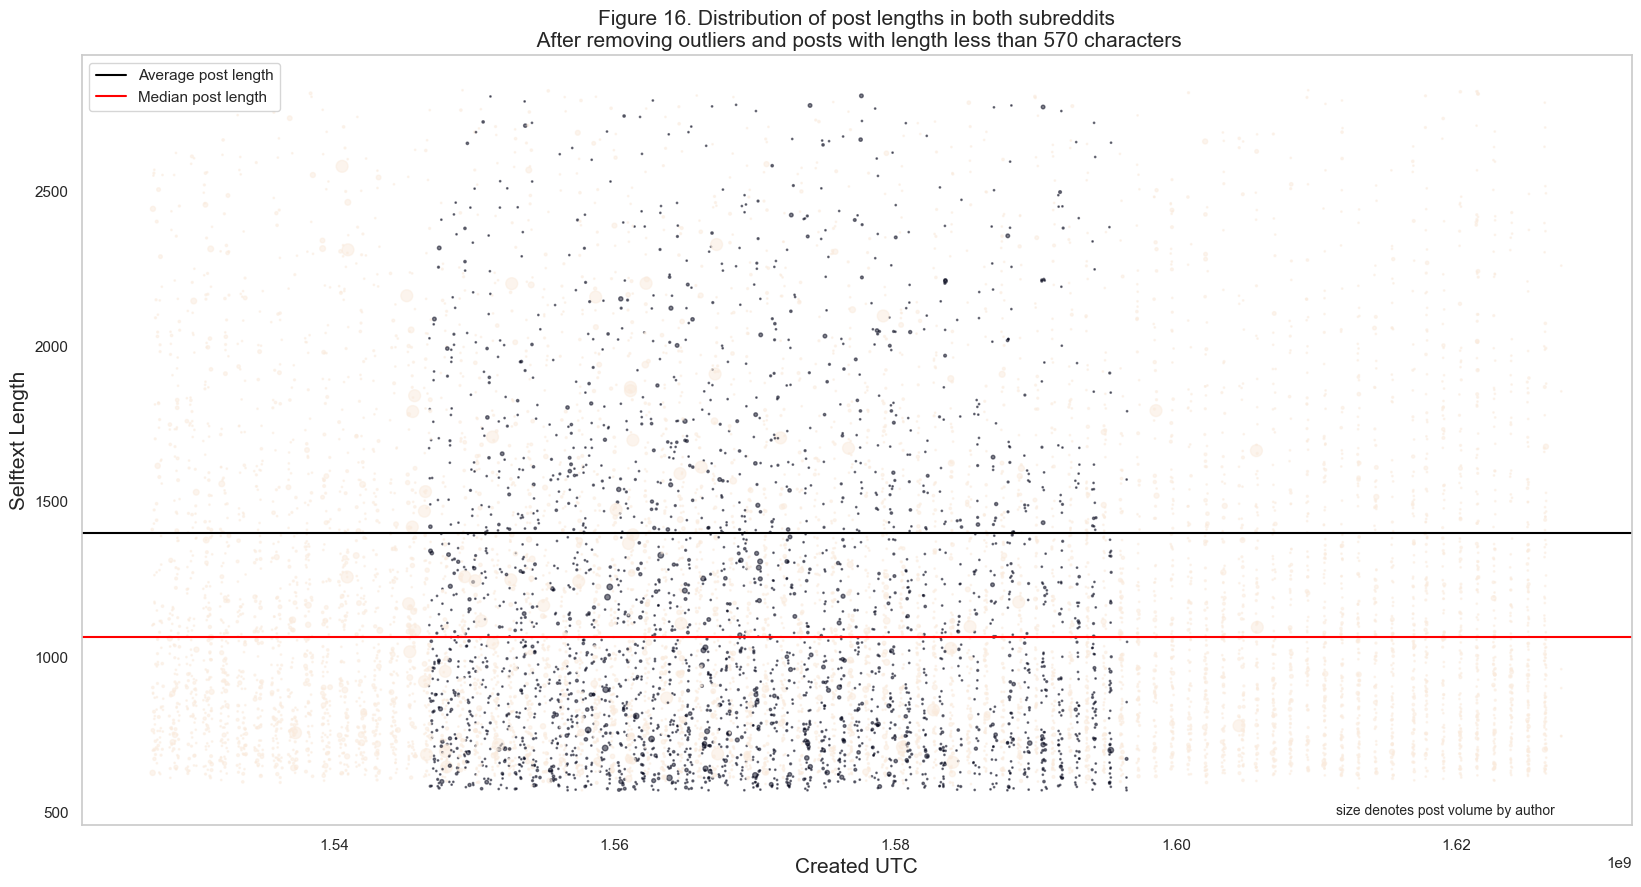

In [259]:
# let's removed all posts with length less than 570 characters (i.e. the length of the shortest post created before 1540000000 UTC) and then plot the plot again.
# remove all posts with length less than 570 characters
print(f'number of rows in df before removing posts with length less than 570 characters: {df.shape[0]}')
preshape = df.shape[0]
df = df[df['selftext_length'] > 570]
print(f'number of rows in df after removing posts with length less than 570 characters: {df.shape[0]}')
print(f'number of rows removed: {preshape - df.shape[0]}')
short_posts_removed = preshape - df.shape[0]

# plot the plot again
figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['target'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 16. Distribution of post lengths in both subreddits\n After removing outliers and posts with length less than 570 characters', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length') # using the previously calculated mean value of the selftext length
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length') # using the previously calculated median value of the selftext length
plt.legend()
plt.savefig('../images/figure_14.png')
plt.show();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


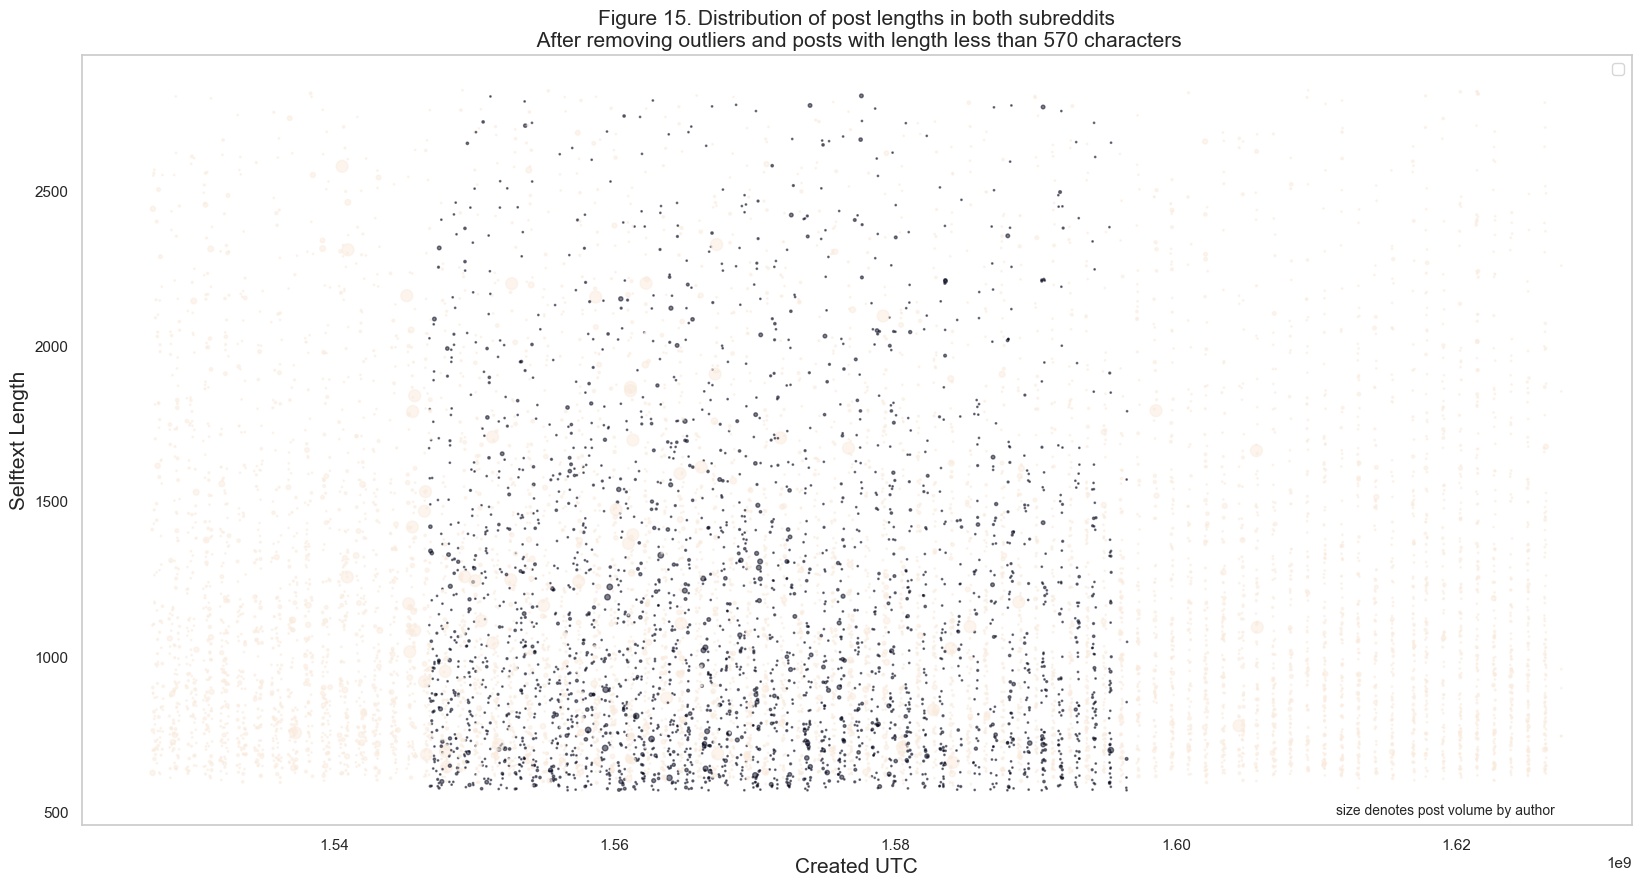

In [260]:
# repeat the plot above but show the class labels of the colors in a legend (i.e. red = autism, blue = ocd)
figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['target'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 15. Distribution of post lengths in both subreddits\n After removing outliers and posts with length less than 570 characters', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.legend()
plt.savefig('../images/figure_15.png')
plt.show();


In [261]:
# when was the earliest OCD post created?
earliest_ocd_post = df[df['target'] == 1]['created_utc'].min() # 1530000000
print(f'earliest OCD post created: {earliest_ocd_post}')
# when was the earliest Autism post created?
earliest_autism_post = df[df['target'] == 0]['created_utc'].min() # 1530000000
print(f'earliest Autism post created: {earliest_autism_post}')

# when was the latest OCD post created?
latest_ocd_post = df[df['target'] == 1]['created_utc'].max() # 1540000000
print(f'latest OCD post created: {latest_ocd_post}')
# when was the latest Autism post created?
latest_autism_post = df[df['target'] == 0]['created_utc'].max() # 1540000000
print(f'latest Autism post created: {latest_autism_post}')

earliest OCD post created: 1527063603
earliest Autism post created: 1546777579
latest OCD post created: 1627465303
latest Autism post created: 1596525852


In [262]:
# remove posts before 1546777579 and after 1596525852
print(f'number of rows in df before removing posts before 1546777579 and after 1596525852: {df.shape[0]}')
preshape = df.shape[0]
df = df[(df['created_utc'] > 1546777579) & (df['created_utc'] < 1596525852)]
print(f'number of rows in df after removing posts before 1546777579 and after 1596525852: {df.shape[0]}')
print(f'number of rows removed: {preshape - df.shape[0]}')
posts_removed = preshape - df.shape[0]


number of rows in df before removing posts before 1546777579 and after 1596525852: 10923
number of rows in df after removing posts before 1546777579 and after 1596525852: 6665
number of rows removed: 4258


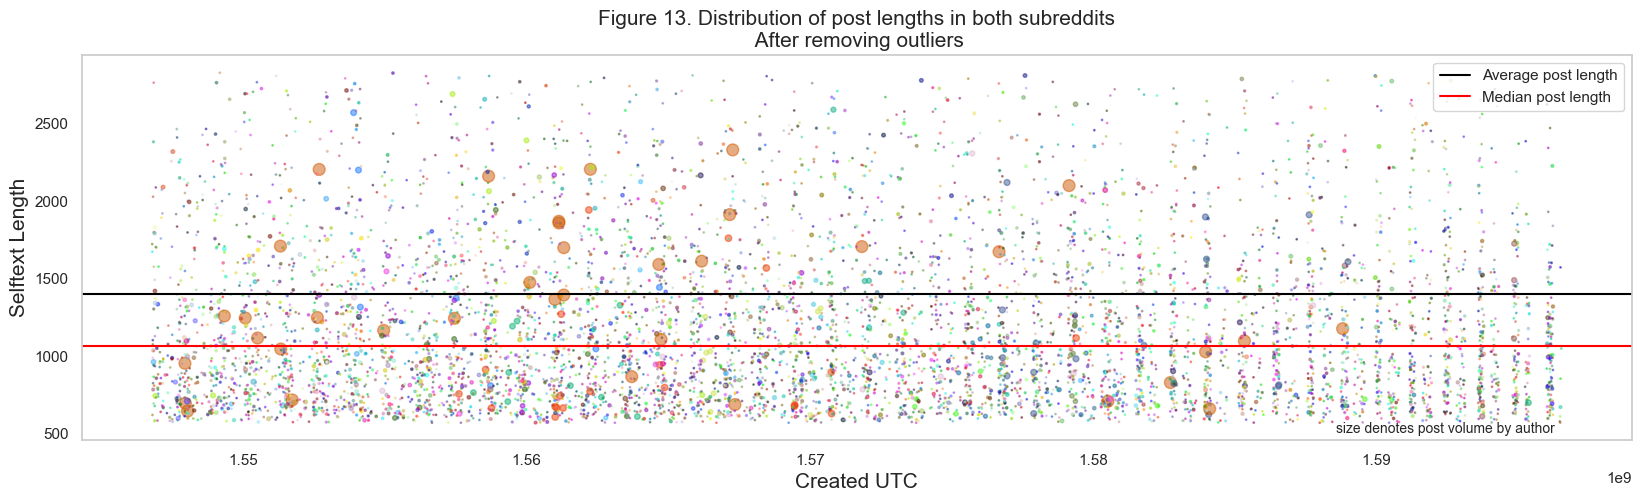

In [263]:
# repeat the plot above but add two horizontal lines to the plot that show:
# 1. the average selftext length for the OCD and Autism subreddits (together) - black line
# 2. the median selftext length for the OCD and Autism subreddits (together) - red line
# also, keep colors the same as before but fade them by 0.5 (i.e. make them 50% transparent) so that the lines are more visible

figure = plt.figure(figsize=(20,5))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'], alpha=0.5)


plt.title('Figure 13. Distribution of post lengths in both subreddits\n After removing outliers', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length') # using the previously calculated mean value of the selftext length
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length') # using the previously calculated median value of the selftext length
plt.legend()
plt.savefig('../images/figure_13.png')
plt.show();

In [264]:
# save this version of the dataframe to a csv file in the data folder
df.to_csv('../data/df_outliers_removed.csv', index=False)

number of rows in df before removing posts with target = 0 that were created after the last post created by a user with target = 1: 6665
number of rows in df after removing posts with target = 0 that were created after the last post created by a user with target = 1: 6658
number of rows removed: 7
number of rows in df before removing posts with target = 0 that were created before the first post created by a user with target = 1: 6658
number of rows in df after removing posts with target = 0 that were created before the first post created by a user with target = 1: 6658
number of rows removed: 0


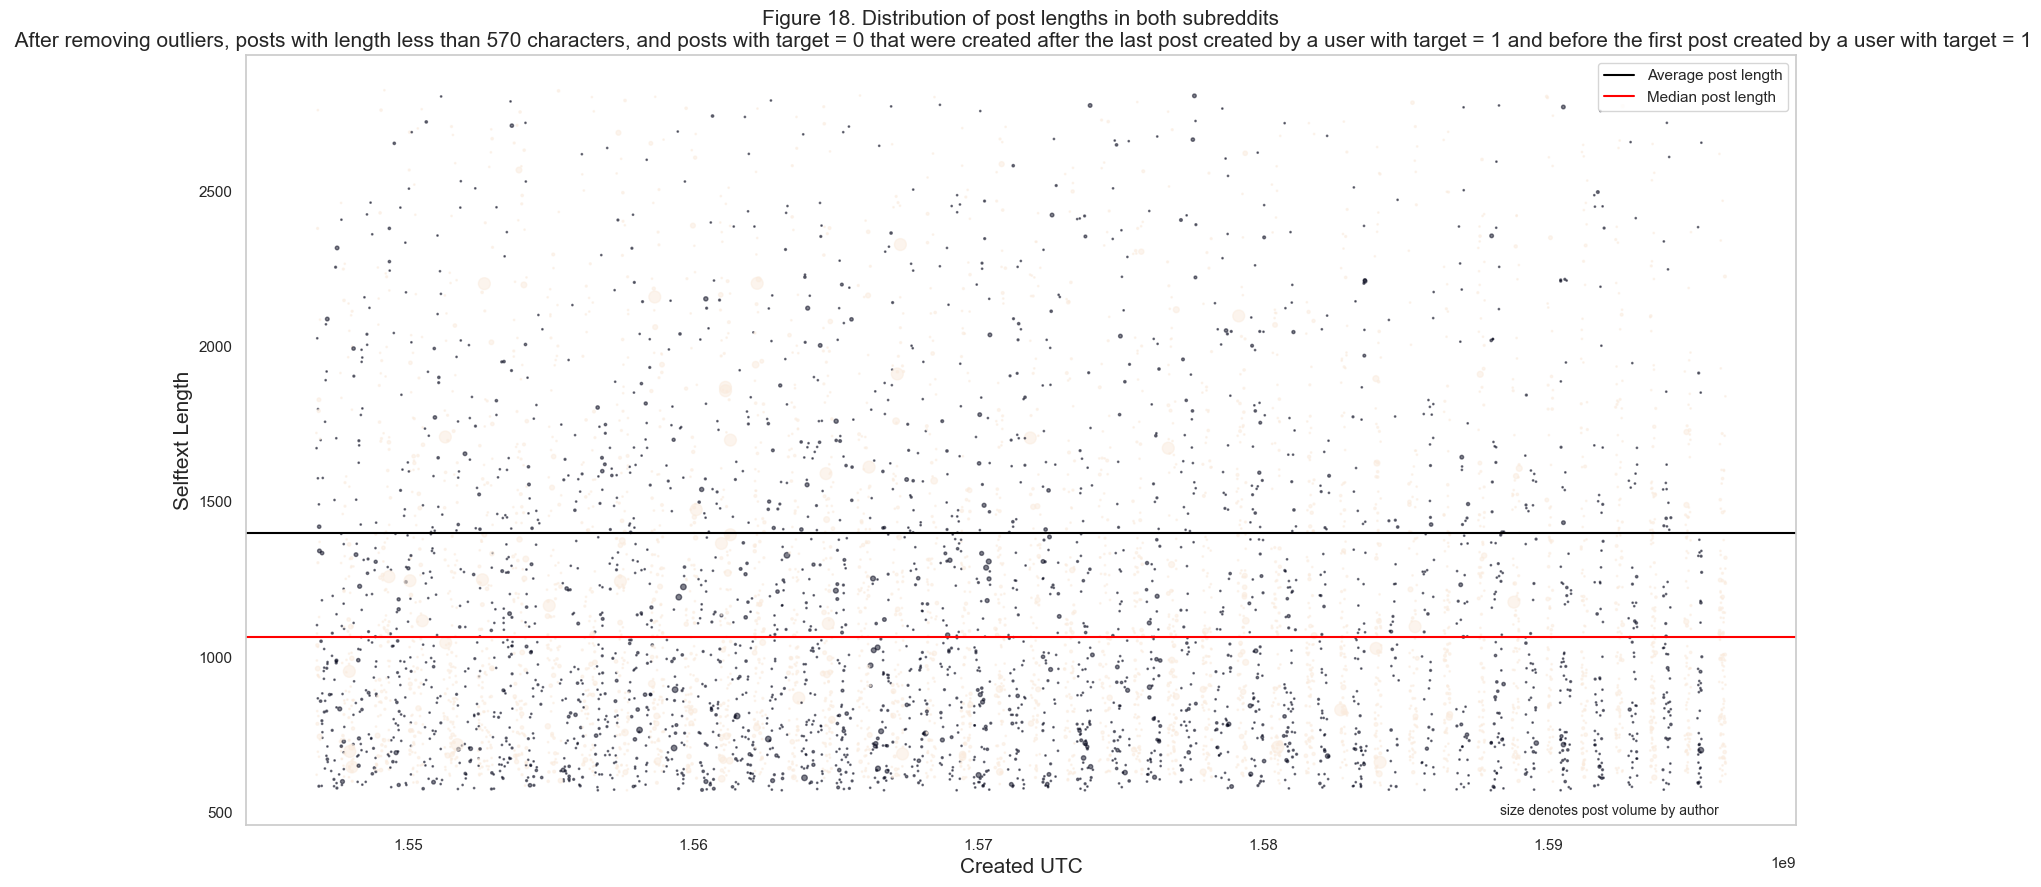

In [265]:
# remove posts with target = 0 that were created after the last post created by a user with target = 1.
# remove posts with target = 0 that were created before the first post created by a user with target = 1.

# step 1. create a list of posts with target = 0
posts_with_target_0 = df[df['target']==0]
# step 2. create a list of posts with target = 1
posts_with_target_1 = df[df['target']==1]
# step 3. find the last post created by a user with target = 1
last_post_created_by_user_with_target_1 = posts_with_target_1['created_utc'].max()
# step 4. find the first post created by a user with target = 1
first_post_created_by_user_with_target_1 = posts_with_target_1['created_utc'].min()
# step 5. remove all posts with target = 0 that were created after the last post created by a user with target = 1
print(f'number of rows in df before removing posts with target = 0 that were created after the last post created by a user with target = 1: {df.shape[0]}')
preshape = df.shape[0]
df = df[~((df['target']==0) & (df['created_utc'] > last_post_created_by_user_with_target_1))]
print(f'number of rows in df after removing posts with target = 0 that were created after the last post created by a user with target = 1: {df.shape[0]}')
print(f'number of rows removed: {preshape - df.shape[0]}')
posts_with_target_0_created_after_last_post_created_by_user_with_target_1_removed = preshape - df.shape[0]
# step 6. remove all posts with target = 0 that were created before the first post created by a user with target = 1
print(f'number of rows in df before removing posts with target = 0 that were created before the first post created by a user with target = 1: {df.shape[0]}')
preshape = df.shape[0]
df = df[~((df['target']==0) & (df['created_utc'] < first_post_created_by_user_with_target_1))]
print(f'number of rows in df after removing posts with target = 0 that were created before the first post created by a user with target = 1: {df.shape[0]}')
print(f'number of rows removed: {preshape - df.shape[0]}')
posts_with_target_0_created_before_first_post_created_by_user_with_target_1_removed = preshape - df.shape[0]

# plot the plot again
figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['target'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 18. Distribution of post lengths in both subreddits\n After removing outliers, posts with length less than 570 characters, and posts with target = 0 that were created after the last post created by a user with target = 1 and before the first post created by a user with target = 1', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length') # using the previously calculated mean value of the selftext length
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length') # using the previously calculated median value of the selftext length
plt.legend()
plt.savefig('../images/figure_18.png')
plt.show();

number of rows in df before removing posts with length less than 570 characters: 6658
number of rows in df after removing posts with length less than 570 characters: 6658
number of rows removed: 0


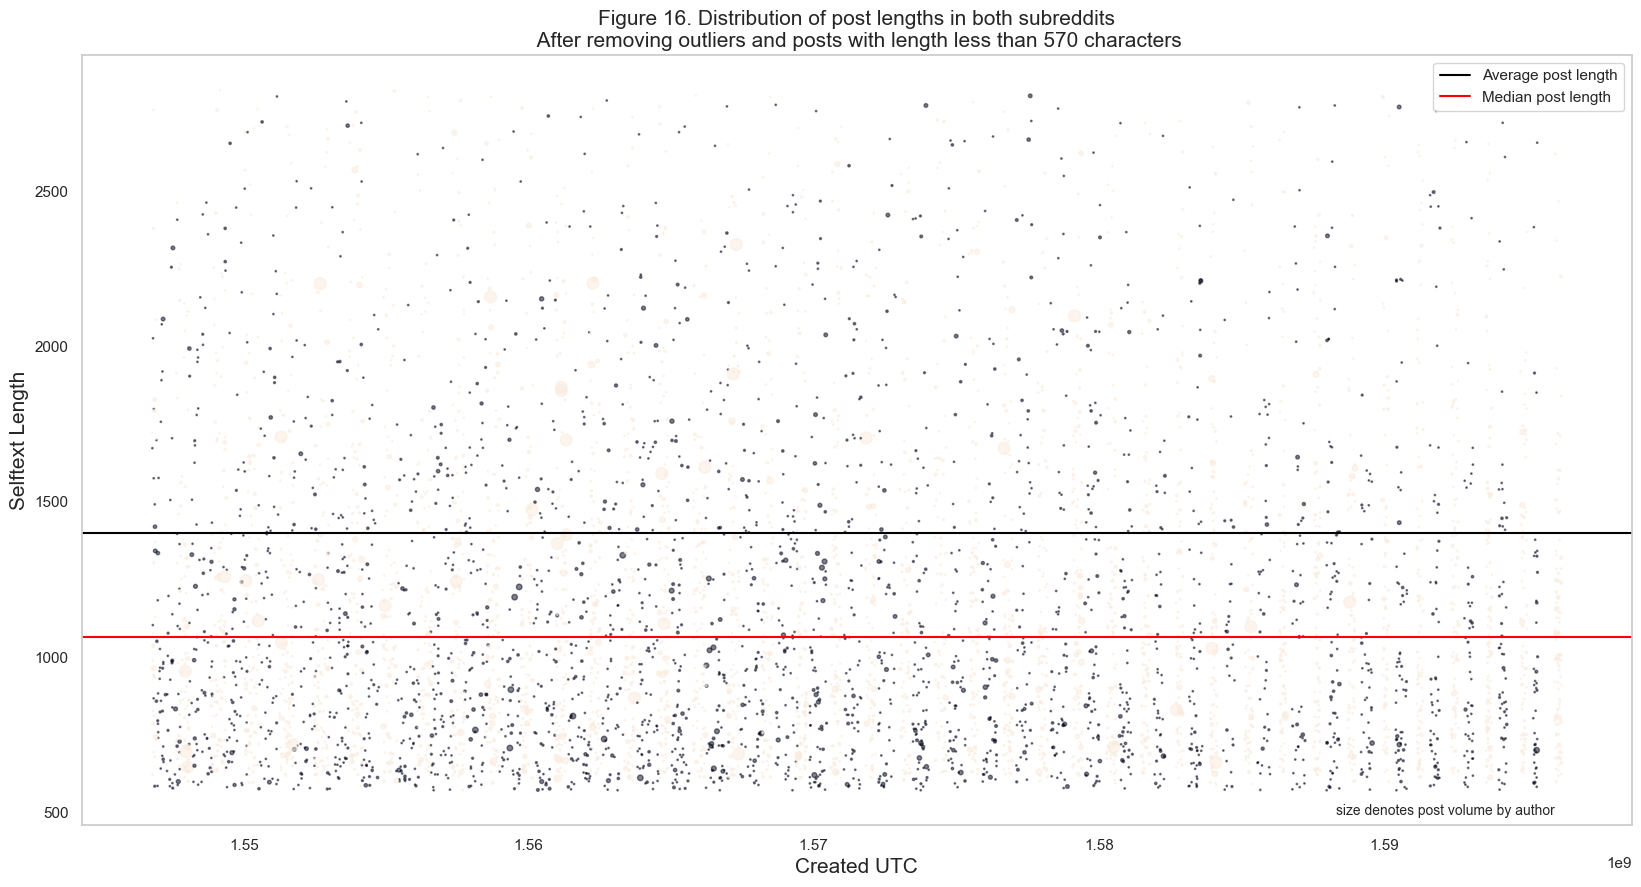

In [266]:
# let's removed all posts with length less than 570 characters (i.e. the length of the shortest post created before 1540000000 UTC) and then plot the plot again.
# remove all posts with length less than 570 characters
print(f'number of rows in df before removing posts with length less than 570 characters: {df.shape[0]}')
preshape = df.shape[0]
df = df[df['selftext_length'] > 570]
print(f'number of rows in df after removing posts with length less than 570 characters: {df.shape[0]}')
print(f'number of rows removed: {preshape - df.shape[0]}')
short_posts_removed = preshape - df.shape[0]

# plot the plot again
figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['target'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 16. Distribution of post lengths in both subreddits\n After removing outliers and posts with length less than 570 characters', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length') # using the previously calculated mean value of the selftext length
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length') # using the previously calculated median value of the selftext length
plt.legend()
plt.savefig('../images/figure_14.png')
plt.show();


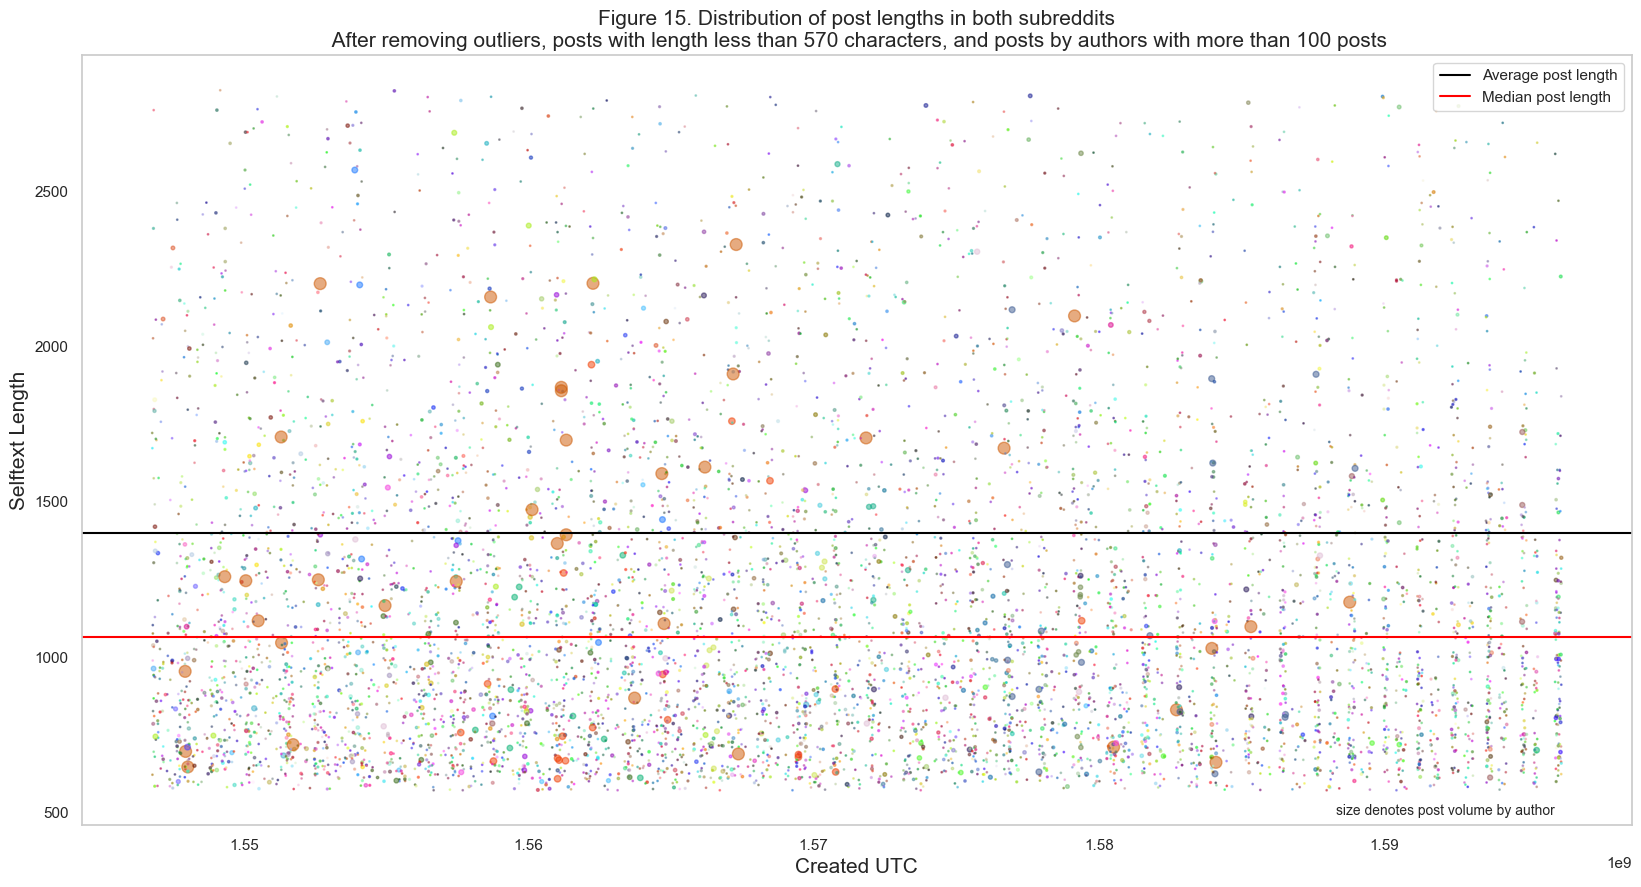

In [267]:
# plot a scatterplot of the 'created_utc' and 'selftext_length' columns with the 'target' column as the color of the points
# set the size of the points to be the 'posts_by_author' column
# set the alpha of the points to 0.5
# set the size of the plot to 20 inches by 10 inches
# add a title to the plot
# add a label to the x-axis
# add a label to the y-axis
# add a legend to the plot
# add a grid to the plot
# save the figure as figure_15.png
# show the plot

figure = plt.figure(figsize=(20,10))
plt.scatter(df['created_utc'], df['selftext_length'], c=df['author_color'], s=df['posts_by_author'], alpha=0.5)
plt.title('Figure 15. Distribution of post lengths in both subreddits\n After removing outliers, posts with length less than 570 characters, and posts by authors with more than 100 posts', fontsize=15)
plt.xlabel('Created UTC', fontsize=15)
plt.ylabel('Selftext Length', fontsize=15)
plt.grid(False) # or use plt.grid(b=None) to remove the grid from all subplots
plt.annotate('size denotes post volume by author', xy=(0.95, 0.01), xycoords='axes fraction', horizontalalignment='right', verticalalignment='bottom', fontsize=10)
plt.axhline(mean_val_preoutlier_removal, color='black', label='Average post length') # using the previously calculated mean value of the selftext length
plt.axhline(median_val_preoutlier_removal, color='red', label='Median post length') # using the previously calculated median value of the selftext length
plt.legend()
plt.savefig('../images/figure_15.png')
plt.show();

In [268]:
df.head()

author  created_utc      id  target  \
2         kiranode   1554270592  b8u505       0   
3           b50142   1560436373  c06jok       0   
4  AccountForMyOCD   1558730325  bsly2g       1   
5     9dollarBilly   1558736351  bsn53g       1   
6       Sage010101   1577439236  eg95c9       0   

                                            selftext  selftext_length  \
2  first group therapy session still stressed out...             1511   
3  participants needed support workers healthcare...             1574   
4  just as i thought i was doing better i encount...              810   
5  which medications worked for yall im sure this...              999   
6  which is the best country to raise kids on the...             1406   

   selftext_word_count    a   b   c  ...   y  z  sentiment  positive  neutral  \
2                  291   93  17  28  ...  33  0    -0.9527     0.088    0.775   
3                  226  107  13  45  ...  29  2     0.9749     0.166    0.769   
4                  164   61  12  23  ...  22  0     0.9487     0.163    0.755   
5                  174   65  16  24  ...  16  0     0.8076     0.137    0.776   
6                  264   96  16  33  ...  34  0     0.9801     0.122    0.849   

   negative  posts_by_author  author_color  ocd_selftext_length  \
2     0.138                1       #8576de                  NaN   
3     0.065                2       #d37eb6                  NaN   
4     0.083               17       #1876ff                810.0   
5     0.087                1       #834bb2                999.0   
6     0.029                1       #d0eb30                  NaN   

   autism_selftext_length  
2                  1511.0  
3                  1574.0  
4                     NaN  
5                     NaN  
6                  1406.0  

[5 rows x 41 columns]

In [269]:
# check the posts that were posted within the UTC range listed above. (1.5475 to 1.598)
# 1547500000 to 1598000000 (UTC)
check_df = df[(df['created_utc'] > 1540000000) & (df['created_utc'] < 1599000000)]
check_df.head(3)

author  created_utc      id  target  \
2         kiranode   1554270592  b8u505       0   
3           b50142   1560436373  c06jok       0   
4  AccountForMyOCD   1558730325  bsly2g       1   

                                            selftext  selftext_length  \
2  first group therapy session still stressed out...             1511   
3  participants needed support workers healthcare...             1574   
4  just as i thought i was doing better i encount...              810   

   selftext_word_count    a   b   c  ...   y  z  sentiment  positive  neutral  \
2                  291   93  17  28  ...  33  0    -0.9527     0.088    0.775   
3                  226  107  13  45  ...  29  2     0.9749     0.166    0.769   
4                  164   61  12  23  ...  22  0     0.9487     0.163    0.755   

   negative  posts_by_author  author_color  ocd_selftext_length  \
2     0.138                1       #8576de                  NaN   
3     0.065                2       #d37eb6                  NaN   
4     0.083               17       #1876ff                810.0   

   autism_selftext_length  
2                  1511.0  
3                  1574.0  
4                     NaN  

[3 rows x 41 columns]

In [270]:
check_df.describe()

created_utc       target  selftext_length  selftext_word_count  \
count  6.658000e+03  6658.000000      6658.000000          6658.000000   
mean   1.570661e+09     0.597327      1187.473415           229.447432   
std    1.412543e+07     0.490473       515.321998           100.878384   
min    1.546788e+09     0.000000       571.000000            43.000000   
25%    1.558662e+09     0.000000       779.000000           150.000000   
50%    1.569727e+09     1.000000      1039.000000           201.000000   
75%    1.582253e+09     1.000000      1460.500000           283.000000   
max    1.596231e+09     1.000000      2826.000000           589.000000   

                 a            b            c            d            e  \
count  6658.000000  6658.000000  6658.000000  6658.000000  6658.000000   
mean     75.529138    15.481977    22.006759    36.902673   110.936618   
std      34.371375     8.298802    11.621469    18.174611    50.021154   
min      22.000000     1.000000     2.000000     6.000000    35.000000   
25%      49.000000     9.000000    14.000000    23.000000    72.000000   
50%      66.000000    14.000000    19.000000    32.000000    97.000000   
75%      93.000000    20.000000    28.000000    46.000000   137.000000   
max     214.000000    60.000000    87.000000   122.000000   304.000000   

                 f  ...           x            y            z    sentiment  \
count  6658.000000  ...  6658.00000  6658.000000  6658.000000  6658.000000   
mean     19.143136  ...     2.23055    24.287324     0.617002    -0.076203   
std       9.886684  ...     2.25487    11.815118     1.159073     0.826671   
min       1.000000  ...     0.00000     0.000000     0.000000    -0.999400   
25%      12.000000  ...     1.00000    16.000000     0.000000    -0.931850   
50%      17.000000  ...     2.00000    22.000000     0.000000    -0.283650   
75%      24.000000  ...     3.00000    30.000000     1.000000     0.872000   
max      69.000000  ...    22.00000    91.000000    17.000000     0.999200   

          positive      neutral     negative  posts_by_author  \
count  6658.000000  6658.000000  6658.000000      6658.000000   
mean      0.102544     0.788688     0.108773         2.362271   
std       0.049214     0.066719     0.056082         5.792468   
min       0.000000     0.512000     0.000000         1.000000   
25%       0.068000     0.745000     0.069000         1.000000   
50%       0.096000     0.791000     0.104000         1.000000   
75%       0.131000     0.835000     0.142000         2.000000   
max       0.388000     1.000000     0.380000        73.000000   

       ocd_selftext_length  autism_selftext_length  
count          3977.000000             2681.000000  
mean           1216.505406             1144.407311  
std             514.696222              513.328322  
min             571.000000              571.000000  
25%             810.000000              738.000000  
50%            1077.000000              988.000000  
75%            1485.000000             1415.000000  
max            2826.000000             2808.000000  

[8 rows x 37 columns]

In [271]:
# print a list of the models that we created
print(f'list of models: {models}')

list of models: [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier()]


In [272]:
# import packages and modules
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

table = pd.DataFrame(columns=['model', 'train_score', 'test_score', 'train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 'train_recall', 'test_recall', 'train_f1', 'test_f1', 'train_roc_auc', 'test_roc_auc', 'train_confusion_matrix', 'test_confusion_matrix', 'train_classification_report', 'test_classification_report'])

# plot the table as a matplotlib table (i.e. not a pandas table) - use the 'table' variable that we created above as the data for the table and use the 'models' variable that we created above as the row labels for the table
# set the size of the table to 20 inches by 10 inches
# set the background color of the table to white
# set the font size of the table to 15
# set the font size of the table header to 15
# set the font size of the table body to 15
# set the font size of the table footer to 15

tempmaster_table = master_results_dataframe.copy()

print(tempmaster_table.columns)
# only keep the columns that we want to display in the table
tempmaster_table = tempmaster_table[['model', 'precision', 'recall', 'f1', 'auc',
       'cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'train_score',
       'test_score', 'accuracy_score']]
m_down_table = tempmaster_table.to_markdown()
# save the table as a markdown file
with open('../tables/table.md', 'w') as f:
    f.write(m_down_table)



Index(['model', 'accuracy', 'precision', 'recall', 'f1', 'auc',
       'cross_val_score', 'rmse', 'mae', 'r2', 'mse', 'time', 'train_score',
       'test_score', 'best_params', 'residuals', 'accuracy_score',
       'best_score'],
      dtype='object')


Use the table generated in the final report.